In [30]:
# !pip install jovian --upgrade --quiet
# !pip install -q kaggle

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from google.colab import files
# from google.colab import drive
# drive.mount('/content/drive')
# import jovian
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Tasas de suicidio de 1985 a 2016**
*El conjunto de datos **"Suicide Rates Overview 1985 to 2016"** recopila información sobre tasas de suicidio a nivel mundial, con el objetivo de encontrar correlaciones con tasas de suicidio más altas en diferentes cohortes a lo largo del tiempo*



---




#Descripción detallada de este conjunto de datos:

- **Columnas:** El conjunto de datos consta de 12 columnas, que incluyen la información siguiente:
- **País:** El país en el que se registraron los datos.
- **Año:** El año en el que se recopilaron los datos.
- **Sexo:** El género (masculino o femenino).
- **Grupo de Edad:** La edad de las personas, dividida en grupos (por ejemplo, 15-24 años, 35-54 años, etc.).
- **Recuento de Suicidios:** La cantidad de suicidios registrados.
-**Población**: La población total en ese grupo demográfico.
- **Tasa de Suicidios:** La tasa de suicidios por cada 100,000 habitantes.
- **Clave Compuesta País-Año:** Una clave que combina información sobre el país y el año.
- **IDH para el Año:** El Índice de Desarrollo Humano para ese año, que mide el desarrollo socioeconómico.
- **PIB para el Año:** El Producto Interno Bruto para ese año.
- **PIB Per Cápita:** El Producto Interno Bruto per cápita para ese año.
- **Generación:** Basado en el promedio del grupo de edad.

# Preparación de datos (SALTAR).
Importamos las bibliotecas necesarias y cargamos el conjunto de datos:

Instalación de Jovian y Kaggle mediante pip

* El paquete jovian se utiliza para guardar y compartir proyectos de ciencia de datos en línea.

* El paquete kaggle proporciona una API de línea de comandos para interactuar con Kaggle, una plataforma en línea para competiciones de ciencia de datos y conjuntos de datos.

In [ ]:
#PARA EJECUTAR ESTA LÍNEA, EN EL COMPUTADOR QUE SE EJECUTE DEBE HABER UNA COPIA DEL JSON WEB TOKEN
#DESCARGABLE DESDE LA PÁGINA DE UNA CUENTA DE KAGGLE EN https://www.kaggle.com/settings/account?...
#ESTE JSON WEB TOKEN ES PERSONAL DE CADA CUENTA Y SIRVE COMO IDENTIFICADOR DE ACCESO.
#CARGUE EL JSON QUE USTED DESCARGÓ DE SU CUENTA DE KAGGLE
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"carlosozapata","key":"bf008703e346e7fee66bc2b2659a302d"}'}

#Extracción de los archivos del conjunto de datos descargados desde Kaggle

* El conjunto de datos descargado

* Los archivos quedan almacenados en el entorno de ejecución de Google Colab siempre y cuando se haya autorizado el acceso de la cuenta de Google a este. Esto se debió realizar en bloques de código anteriores.

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
#Para descargar el conjunto de datos desde Kaggle al drive local de Google

!kaggle datasets download 'russellyates88/suicide-rates-overview-1985-to-2016'


  0% 0.00/397k [00:00<?, ?B/s]
100% 397k/397k [00:00<00:00, 82.0MB/s]


In [ ]:
import os
from zipfile import ZipFile

# Especifica el nombre del archivo .zip que deseas descomprimir
file = "suicide-rates-overview-1985-to-2016.zip"

# Abre el archivo .zip en modo lectura
with ZipFile(file, 'r') as zip:

    # Extrae todos los archivos
    print('Extracción de archivos en proceso...')
    zip.extractall()
    print('Extracción terminada')

# Cambia al directorio de trabajo deseado (en este ejemplo, cambiamos al directorio "/content/")
%cd "/content/"

# Descomprime cualquier otro archivo .zip que se encuentre en el directorio actual
for archivo in os.listdir():
  if archivo.endswith(".zip"):
    with ZipFile(archivo, 'r') as zip_ref:
      zip_ref.extractall("/content/")

# Luego de ejecutar este código, los archivos .zip se habrán descomprimido en el directorio actual.


Extracción de archivos en proceso...
Extracción terminada
/content


In [ ]:
import os

# Listar el contenido del directorio '/content/'
for item in os.listdir('/content/'):
    print(item)


.config
drive
suicide-rates-overview-1985-to-2016.zip
master.csv
sample_data


# Análisis exploratorio de datos (EDA)

In [144]:
# Cargar el archivo "master.csv" en un DataFrame
datos = pd.read_csv('./data/master.csv', encoding='utf-8-sig')

# Mostrar la cantidad de filas y columnas en el DataFrame
print(f"Cantidad de filas en el archivo de entrenamiento:\t{datos.shape[0]}")
print(f"Cantidad de columnas en el archivo de entrenamiento:\t{datos.shape[1]}")

# Renombrar las columnas para quitar espacios al inicio y al final
datos.rename(columns=lambda x: x.strip(), inplace=True)

# Número de valores únicos en cada columna
for columna in datos.columns:
    print(f"\nValores únicos en {columna}: {datos[columna].nunique()}")
 
# Resumen general del conjunto de datos
print("\nResumen general del conjunto de datos:")
display(datos.info())
display(datos.describe())

# Verificación de valores faltantes en el conjunto de datos
print("\nValores faltantes en el conjunto de datos:")
display(datos.isnull().sum())

# Imputación de valores faltantes en la columna "HDI for year" con la mediana
print("\nLos valores faltantes en la columna 'HDI for year' se imputarán con la mediana.")
median_hdi = datos['HDI for year'].median()
datos['HDI for year'].fillna(median_hdi, inplace=True)


Cantidad de filas en el archivo de entrenamiento:	27820
Cantidad de columnas en el archivo de entrenamiento:	12

Valores únicos en country: 101

Valores únicos en year: 32

Valores únicos en sex: 2

Valores únicos en age: 6

Valores únicos en suicides_no: 2084

Valores únicos en population: 25564

Valores únicos en suicides/100k pop: 5298

Valores únicos en country-year: 2321

Valores únicos en HDI for year: 305

Valores únicos en gdp_for_year ($): 2321

Valores únicos en gdp_per_capita ($): 2233

Valores únicos en generation: 6

Resumen general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no      

None

year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000       126352.000000


Valores faltantes en el conjunto de datos:


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
gdp_for_year ($)          0
gdp_per_capita ($)        0
generation                0
dtype: int64


Los valores faltantes en la columna 'HDI for year' se imputarán con la mediana.


In [141]:
# Imprimir los primeros 5 valores de la tabla
display(datos.head())

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year gdp_for_year ($)  \
0               6.71  Albania1987         0.779    2,156,624,900   
1               5.19  Albania1987         0.779    2,156,624,900   
2               4.83  Albania1987         0.779    2,156,624,900   
3               4.59  Albania1987         0.779    2,156,624,900   
4               3.28  Albania1987         0.779    2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

In [172]:
# Exportar el DataFrame procesado a un archivo .csv
datos.to_csv('./data/master_procesado.csv', index=False, encoding='utf-8-sig', sep=';', decimal=',')

In [173]:
# carga el dataframe procesado y lo compara con el original
datos_procesados = pd.read_csv('./data/master_procesado.csv', encoding='utf-8-sig', sep=';', decimal=',')
if datos.equals(datos_procesados):
    print("\nEl DataFrame procesado es igual al original.")


El DataFrame procesado es igual al original.


**Conclusiones del conjunto de datos**

- **Visión de Suicidios:** El conjunto de datos ofrece una visión de la información sobre suicidios en múltiples países a lo largo de varios años. Contiene un total de 27,820 registros distribuidos en 12 columnas.

- **Información Relevante:** Las columnas proporcionan información relevante, incluyendo datos demográficos, cifras de suicidios, población, tasas de suicidio y datos económicos. Esto permite realizar un análisis detallado de este fenómeno a nivel global.

- **Valores Faltantes Tratados:** Se identificaron valores faltantes en la columna "HDI for year", los cuales se han imputado utilizando la mediana de los valores disponibles en esa columna.

- **Diversidad de Formatos:** El conjunto de datos presenta una diversidad de formatos de datos, incluyendo objetos, valores enteros y números de punto flotante.

- **Relevancia para Temas Clave:** La información contenida en este conjunto de datos es de gran relevancia para abordar temas relacionados con la salud mental, las tendencias de suicidio, el desarrollo humano y la economía en diferentes países y a lo largo del tiempo.

**Estadísticas Descriptivas para las Variables Numéricas**

- **year:** El conjunto de datos abarca un período desde 1985 hasta 2016. 

- **suicides_no:** La columna "suicides_no" representa el número de suicidios, con una variabilidad significativa. Los valores oscilan desde un mínimo de 0 hasta un máximo de 22,338 suicidios, con un promedio de aproximadamente 242.57 suicidios.

- **population:** La columna "population" refleja el tamaño de la población en los países estudiados, con variaciones considerables. Los valores oscilan desde un mínimo de alrededor de 278 personas hasta un máximo de aproximadamente 43.8 millones.

- **suicides/100k pop:** Esta columna muestra la tasa de suicidios por cada 100,000 habitantes, con tasas que varían desde 0 (sin suicidios) hasta un máximo de 224.97.

- **HDI for year:** La columna "HDI for year" representa el Índice de Desarrollo Humano (HDI) para cada año. Solo contiene datos para un subconjunto de registros (8,364 de 27,820). El HDI varía desde 0.483 (bajo desarrollo humano) hasta 0.944 (alto desarrollo humano), con un promedio de aproximadamente 0.776.

- **gdp_per_capita:** La columna "gdp_per_capita ($)" representa el Producto Interno Bruto (PIB) per cápita en dólares, con un rango amplio de valores, desde un mínimo de 251 dólares hasta un máximo de 126,352 dólares.

**Valores Categóricos Relevantes**

- **Países Únicos:** Se registran datos para 101 países diferentes.

- **Grupos de Edad:** Las edades se agrupan en 6 categorías diferentes.

- **Género:** Se registran dos categorías de género.

- **Generación:** Los datos incluyen información sobre 6 generaciones diferentes.

**Implicaciones y Relevancia**

- La alta variabilidad en la cantidad y tasas de suicidio destaca la importancia de realizar análisis de tendencias a lo largo del tiempo y entre diferentes regiones.

- La inclusión limitada de datos HDI sugiere la necesidad de abordar este atributo cuidadosamente al realizar análisis y modelado predictivo.

- La diversidad en el desarrollo económico entre países subraya la importancia de explorar cómo las condiciones económicas pueden influir en las tasas de suicidio.

- La disponibilidad de datos generacionales brinda la oportunidad de investigar si las tendencias de suicidio varían según la edad y la generación.



Llenar valores faltantes con la Mediana.
Para solucionar el problema de valores faltantes en el conjunto de datos, específicamente en la columna "HDI for year". Utilizamos la estrategia de imputación, reemplazando los valores faltantes por la mediana de la columna. Posteriormente, verificamos si los datos se llenaron correctamente al contar los valores nulos en la columna "HDI for year". Esta acción es esencial para garantizar que los valores faltantes no interfieran con nuestros análisis y modelos subsiguientes. El resultado de la verificación confirmó que los datos en la columna "HDI for year" están ahora llenados y listos para su uso en el análisis y modelado de datos.

Gráfico de Dispersión
El gráfico de dispersión que muestra la relación entre el PIB per cápita y la tasa de suicidio proporciona información valiosa sobre cómo estas dos variables se relacionan entre sí. Aquí hay un análisis del gráfico:

- Distribución de PIB per Cápita: En el eje X (horizontal), tenemos el PIB per cápita, que es una medida de la riqueza económica de un país. Observamos que la mayoría de los puntos están concentrados en la parte inferior de la escala del PIB per cápita, lo que indica que la mayoría de los países tienen un PIB per cápita relativamente bajo.

- Tasa de Suicidio: En el eje Y (vertical), representamos la tasa de suicidio por cada 100,000 habitantes. En este eje, observamos una dispersión más amplia de puntos. Algunos países tienen tasas de suicidio muy bajas, mientras que otros tienen tasas más altas.

- Relación entre PIB per Cápita y Tasa de Suicidio: Al observar la distribución de puntos en el gráfico, podemos notar que no existe una relación lineal clara entre el PIB per cápita y la tasa de suicidio. En otras palabras, no se puede decir que un aumento en el PIB per cápita se traduzca automáticamente en una disminución de la tasa de suicidio, y viceversa. La relación es compleja y está influenciada por múltiples factores.

- Outliers: Observamos algunos puntos que están bastante alejados de la mayoría. Estos pueden representar países con características inusuales en términos de tasas de suicidio y PIB per cápita. Es importante identificar y comprender estos puntos atípicos, ya que podrían proporcionar información valiosa sobre factores específicos que influyen en las tasas de suicidio.

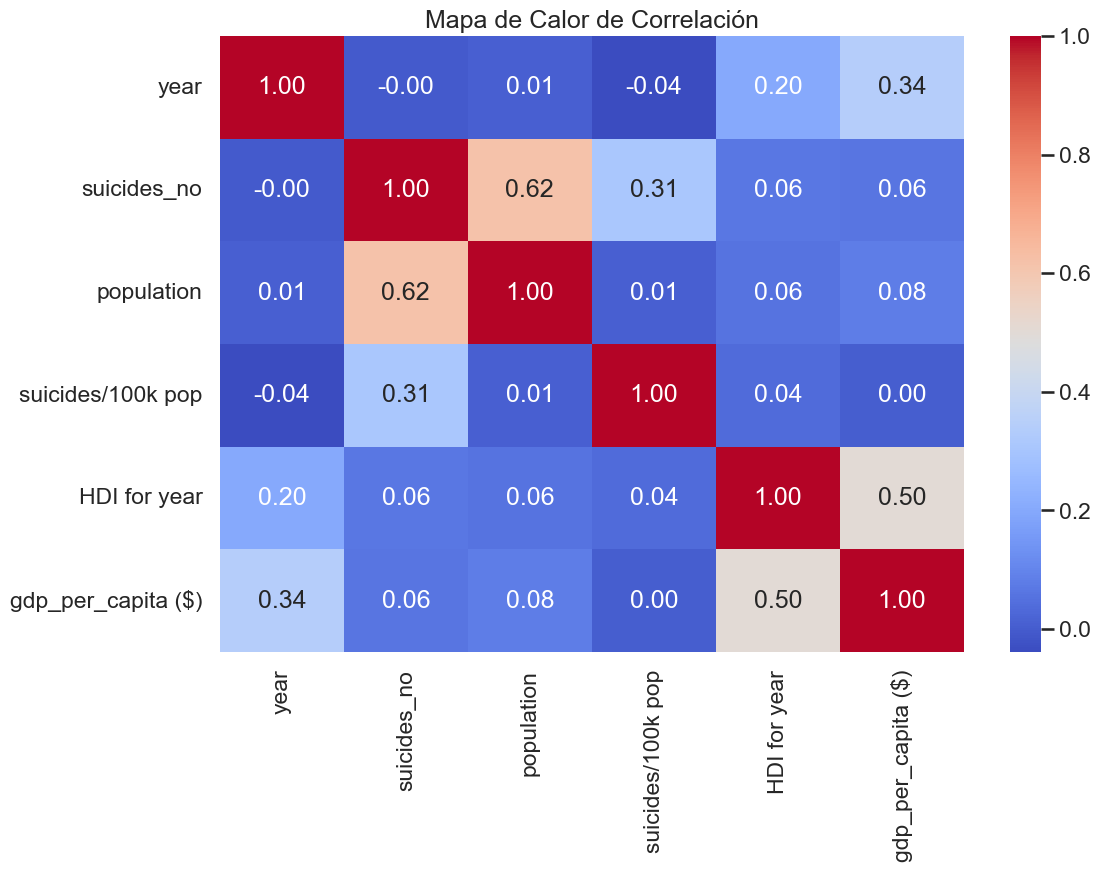

year  suicides_no  population  suicides/100k pop  \
year                1.000000    -0.004546    0.008850          -0.039037   
suicides_no        -0.004546     1.000000    0.616162           0.306604   
population          0.008850     0.616162    1.000000           0.008285   
suicides/100k pop  -0.039037     0.306604    0.008285           1.000000   
HDI for year        0.202184     0.063224    0.057240           0.037894   
gdp_per_capita ($)  0.339134     0.061330    0.081510           0.001785   

                    HDI for year  gdp_per_capita ($)  
year                    0.202184            0.339134  
suicides_no             0.063224            0.061330  
population              0.057240            0.081510  
suicides/100k pop       0.037894            0.001785  
HDI for year            1.000000            0.502250  
gdp_per_capita ($)      0.502250            1.000000

In [131]:
# Mapa de Calor de Correlación
plt.figure(figsize=(12, 8))
correlation_matrix = datos.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlación")
plt.show()
# Crear un DataFrame a partir de la matriz de correlación
pd.DataFrame(correlation_matrix)

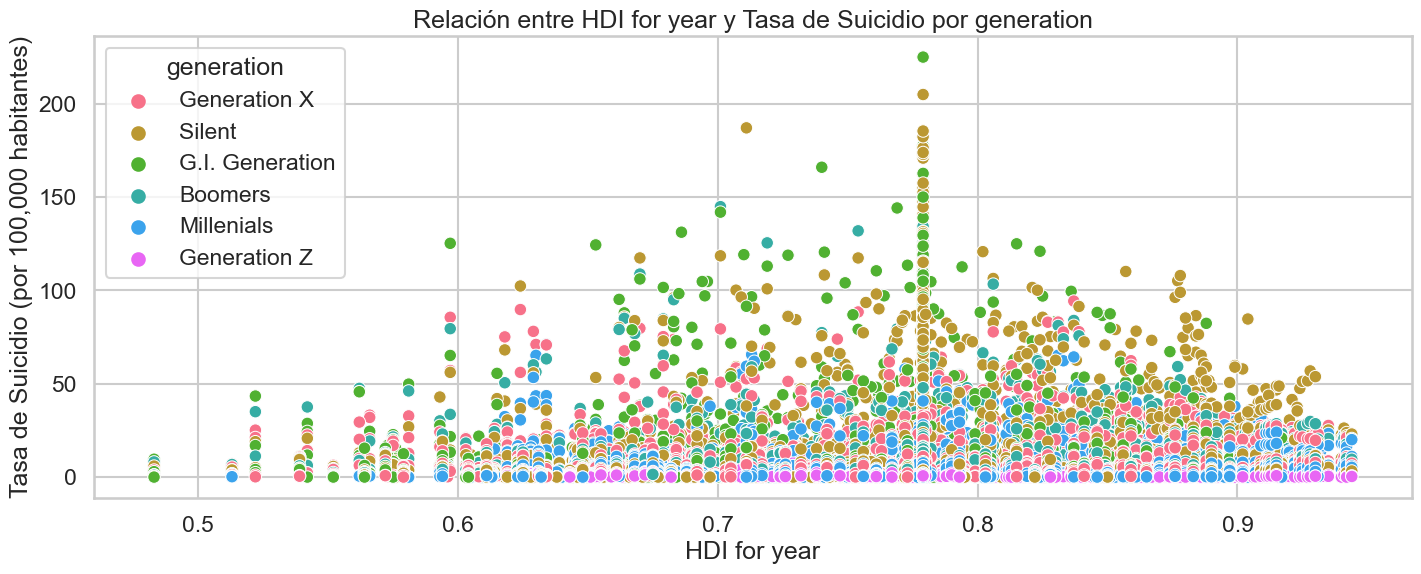

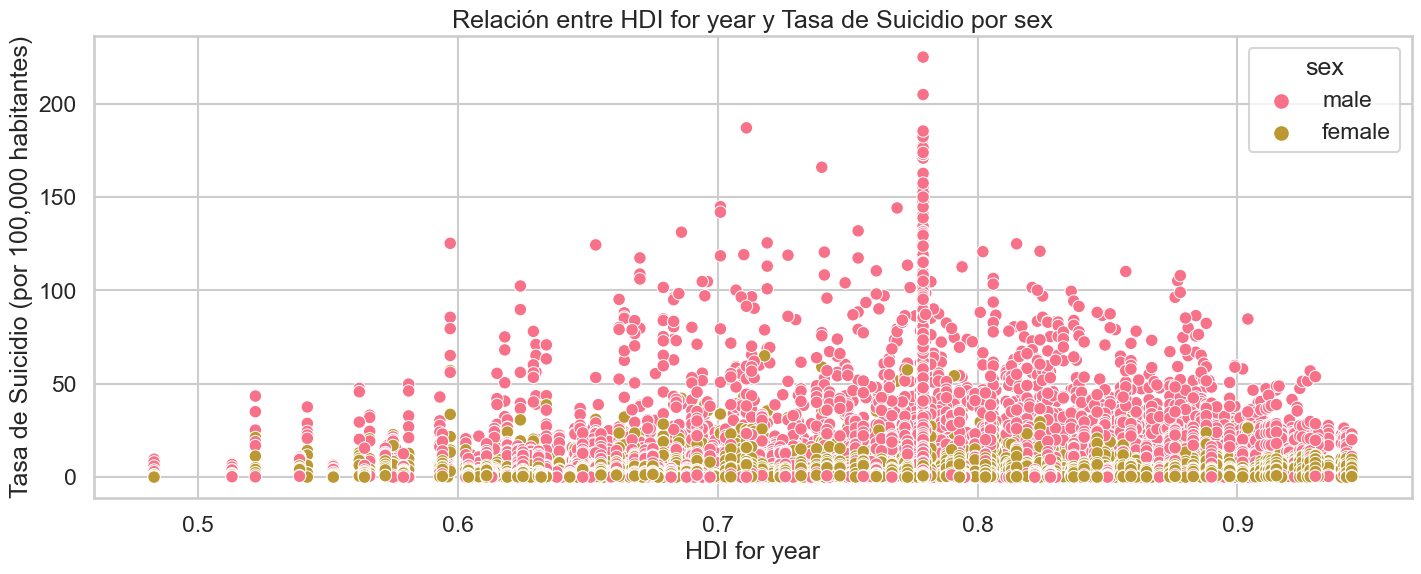

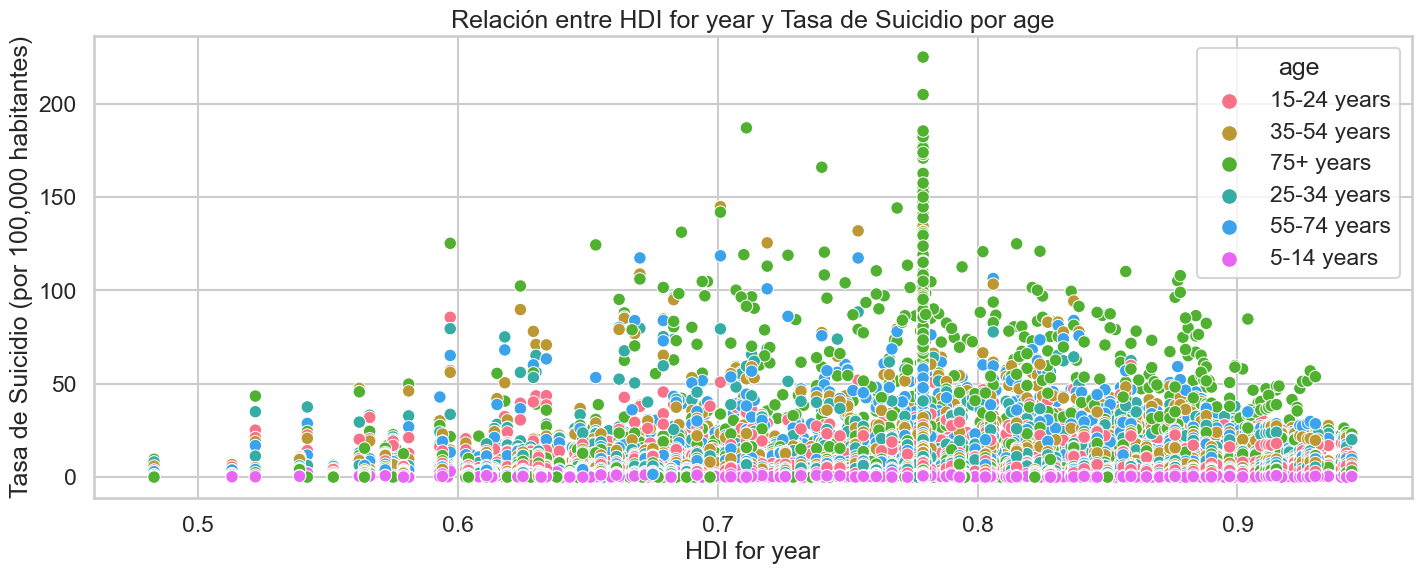

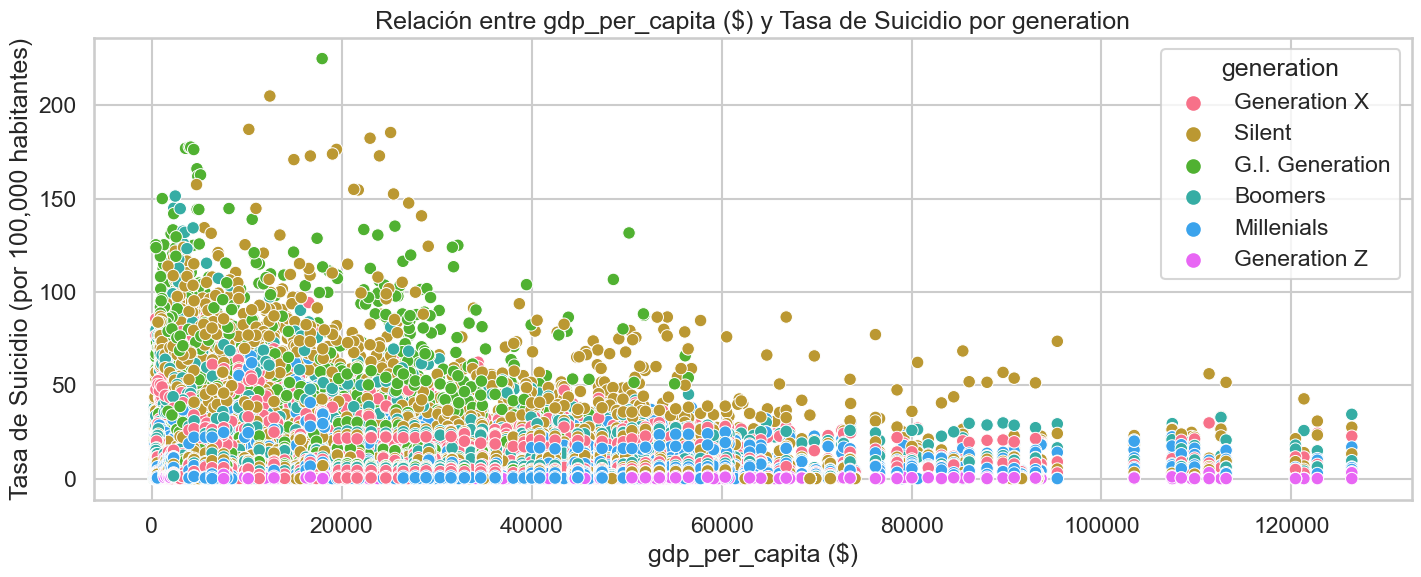

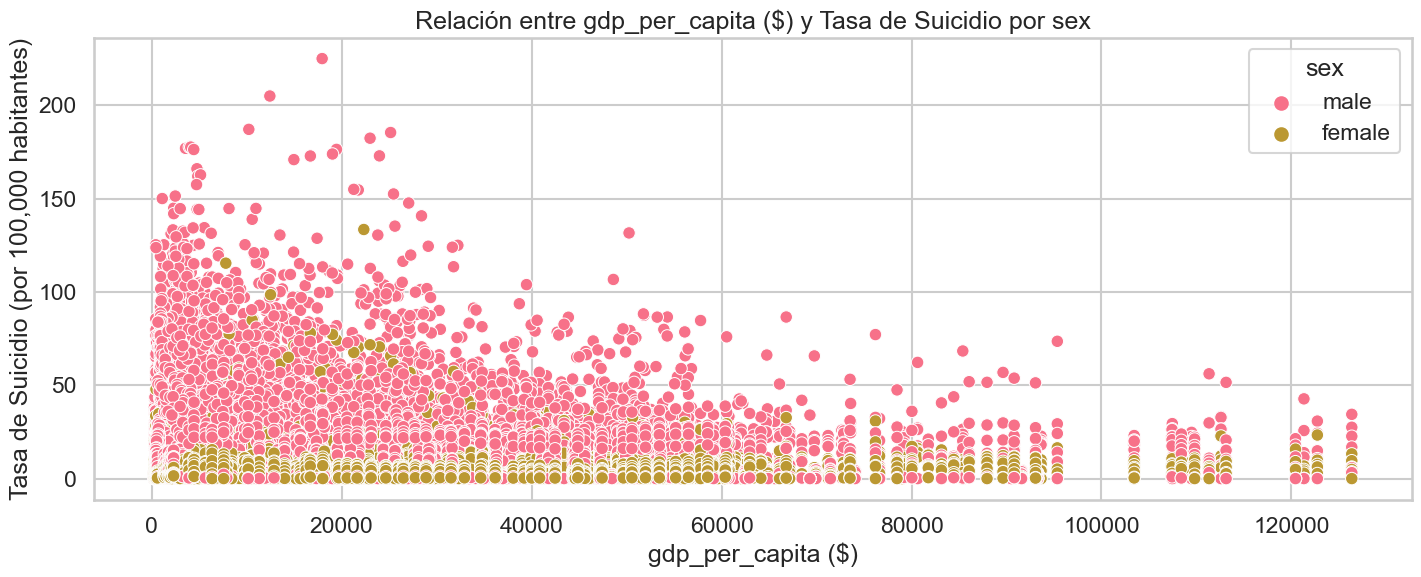

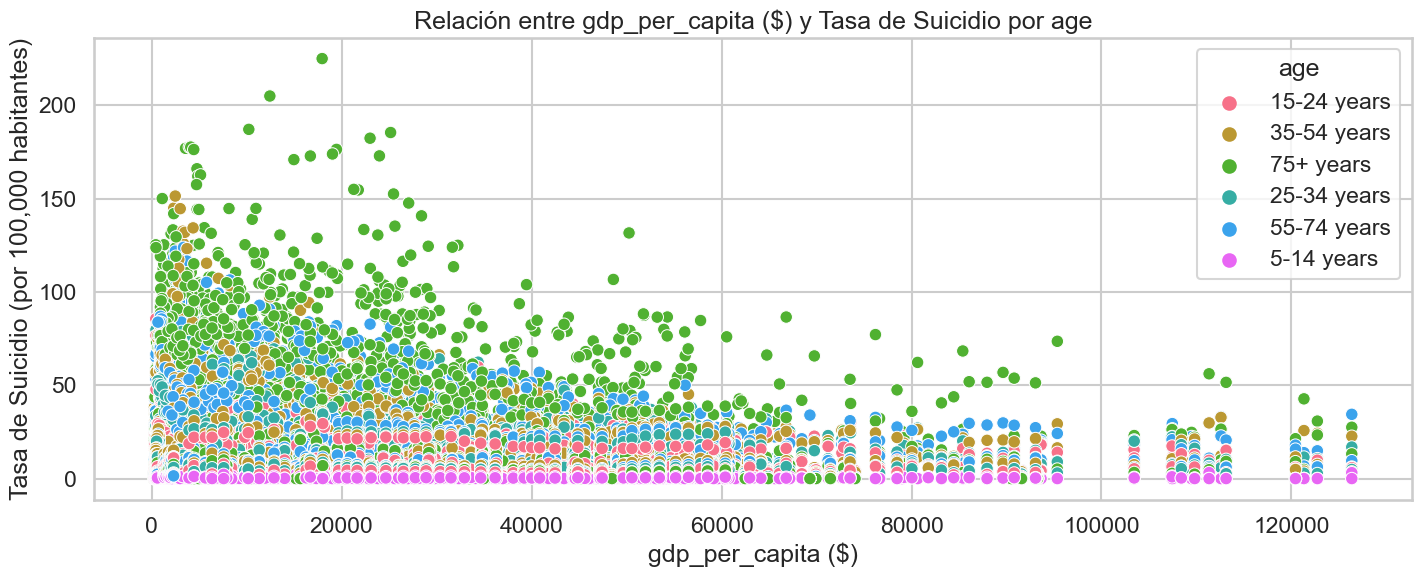

Resumen de correlación con HDI:


Variable Numérica  Correlación con HDI
0         suicides_no             0.063224
1          population             0.057240
2   suicides/100k pop             0.037894
3        HDI for year             1.000000
4  gdp_per_capita ($)             0.502250
5                year             0.202184


Resumen de correlación con GDP:


Variable Numérica  Correlación con GDP
0         suicides_no             0.061330
1          population             0.081510
2   suicides/100k pop             0.001785
3        HDI for year             0.502250
4  gdp_per_capita ($)             1.000000
5                year             0.339134

In [140]:
# Listas de columnas categóricas y numéricas
categorical_cols = ['generation', 'sex', 'age', 'country']
numeric_cols = ['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)', 'year']

# Crear un gráfico de dispersión para Tasa de Suicidio vs. Índice de Desarrollo Humano (HDI) y otras variables categóricas
for col in ['HDI for year', 'gdp_per_capita ($)']:
    for hue in categorical_cols[:-1]:
        plt.figure(figsize=(17, 6))
        sns.scatterplot(x=col, y="suicides/100k pop", hue=hue, data=datos)
        plt.title(f"Relación entre {col} y Tasa de Suicidio por {hue}")
        plt.xlabel(col)
        plt.ylabel("Tasa de Suicidio (por 100,000 habitantes)")
        plt.show()

# Calcular la correlación entre "HDI for year" y todas las variables numéricas
correlation_hdi = datos[numeric_cols].corr()['HDI for year']

# Calcular la correlación entre "gdp_per_capita ($)" y todas las variables numéricas
correlation_gdp = datos[numeric_cols].corr()['gdp_per_capita ($)']

# Crear DataFrames para los resultados
result_hdi = pd.DataFrame({'Variable Numérica': correlation_hdi.index, 'Correlación con HDI': correlation_hdi.values})
result_gdp = pd.DataFrame({'Variable Numérica': correlation_gdp.index, 'Correlación con GDP': correlation_gdp.values})

# Mostrar las tablas de resumen
print("Resumen de correlación con HDI:")
display(result_hdi)
print("\nResumen de correlación con GDP:")
display(result_gdp)

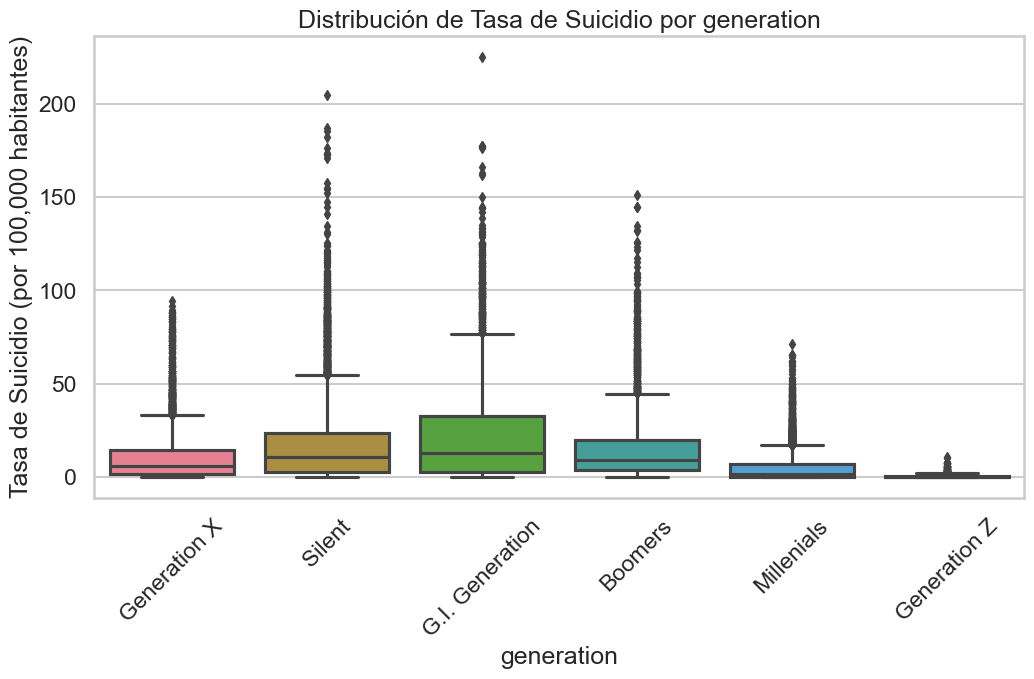

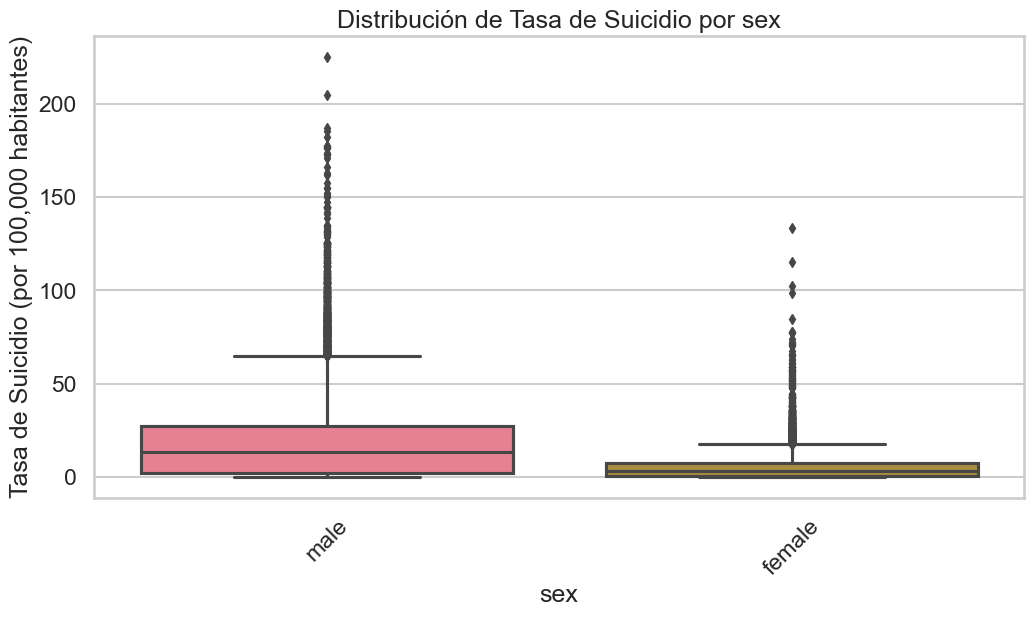

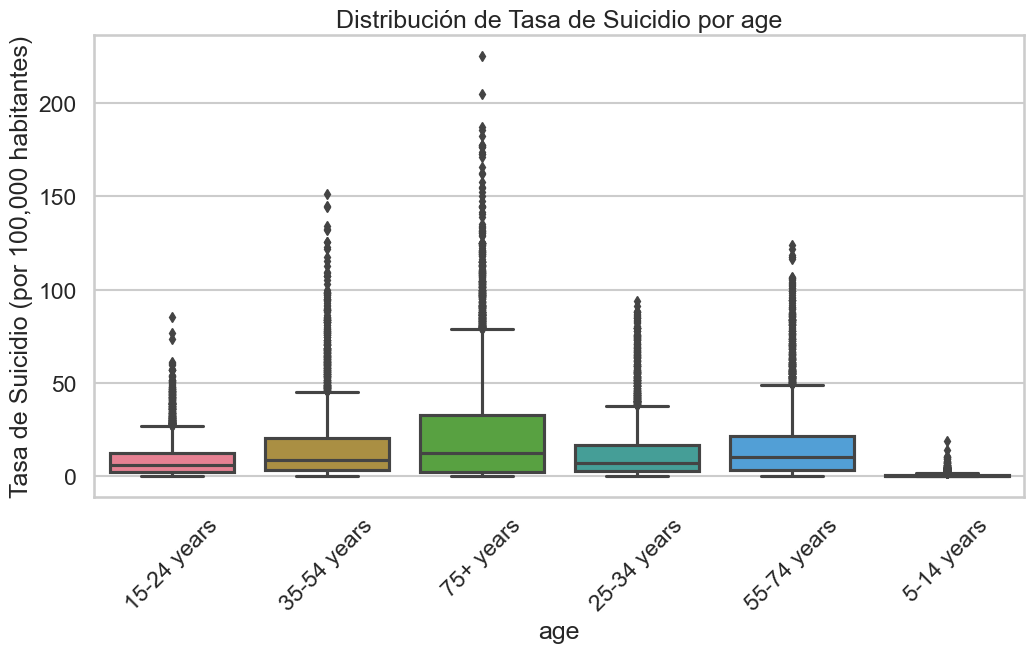

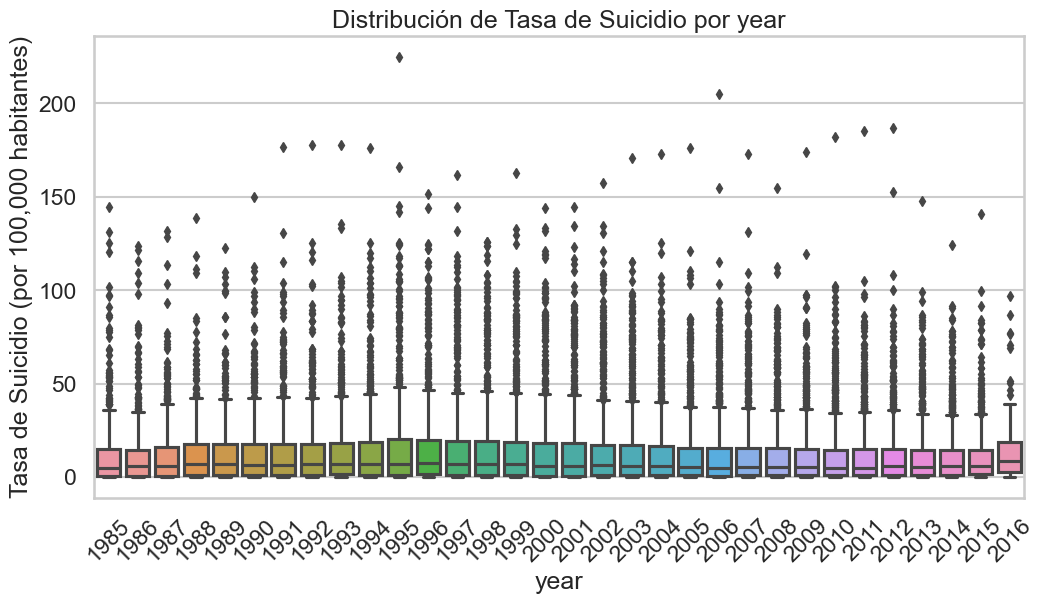

DataFrame de resúmenes de estadísticas descriptivas:


count       mean        std  min     25%     50%      75%  \
generation                                                                    
Boomers          4990.0  14.742094  17.443697  0.0  3.5900   9.060  20.1300   
G.I. Generation  2744.0  23.946378  29.431211  0.0  2.9975  13.025  32.5650   
Generation X     6408.0  10.556874  13.259527  0.0  1.8275   5.915  14.4225   
Generation Z     1470.0   0.642299   1.044738  0.0  0.0000   0.330   0.8775   
Millenials       5844.0   5.383597   8.464176  0.0  0.2700   1.720   7.0000   
Silent           6364.0  18.418848  23.216520  0.0  2.6875  10.735  23.5000   

                    max  
generation               
Boomers          151.33  
G.I. Generation  224.97  
Generation X      94.28  
Generation Z      11.02  
Millenials        71.17  
Silent           204.92

count       mean        std  min     25%    50%    75%     max
sex                                                                     
female  13910.0   5.392866   7.358993  0.0  0.4100   3.16   7.41  133.42
male    13910.0  20.239329  23.552754  0.0  2.4225  13.55  27.36  224.97

count       mean        std  min     25%     50%      75%  \
age                                                                       
15-24 years  4642.0   8.947154   9.578081  0.0  2.4125   5.915  12.3600   
25-34 years  4642.0  12.186885  14.107455  0.0  2.9300   7.250  16.9775   
35-54 years  4642.0  14.947441  17.700421  0.0  3.6500   9.080  20.4600   
5-14 years   4610.0   0.620041   1.017878  0.0  0.0000   0.320   0.8100   
55-74 years  4642.0  16.155579  18.240465  0.0  3.4500  10.405  21.7875   
75+ years    4642.0  23.955409  30.239147  0.0  2.1525  12.470  32.9275   

                max  
age                  
15-24 years   85.59  
25-34 years   94.18  
35-54 years  151.33  
5-14 years    18.92  
55-74 years  123.83  
75+ years    224.97

count       mean        std  min     25%    50%      75%     max
year                                                                   
1985   576.0  11.826198  19.216259  0.0  0.2800  4.740  14.7825  144.65
1986   576.0  11.423333  17.631921  0.0  0.3275  5.565  14.2300  123.72
1987   648.0  11.644213  16.919688  0.0  0.4700  5.670  16.0875  131.87
1988   588.0  12.709405  17.183725  0.0  0.8275  6.990  17.4375  138.89
1989   624.0  12.879071  17.437589  0.0  0.9625  6.945  17.4525  122.41
1990   768.0  12.862956  17.741396  0.0  0.9750  6.560  17.6000  150.00
1991   768.0  13.438880  19.116333  0.0  0.9600  6.560  17.8100  176.91
1992   780.0  13.498564  18.895867  0.0  1.2250  6.735  17.6275  177.61
1993   780.0  13.833705  19.803867  0.0  1.2800  6.735  18.1850  177.57
1994   816.0  14.073272  20.413814  0.0  1.0950  6.705  18.5925  176.26
1995   936.0  15.662671  23.814197  0.0  1.1725  7.145  20.4225  224.97
1996   924.0  15.305422  22.274584  0.0  1.4100  7.190  19.6825  151.33
1997   924.0  14.954361  22.084821  0.0  1.1225  6.835  18.9900  161.92
1998   948.0  14.926920  21.562311  0.0  1.1500  6.810  19.2350  125.78
1999   996.0  14.532038  21.230050  0.0  1.0250  6.665  18.6725  162.67
2000  1032.0  13.941328  21.286035  0.0  0.6850  5.900  18.1775  144.15
2001  1056.0  13.519138  20.157330  0.0  0.7000  5.780  18.0225  144.71
2002  1032.0  13.786550  20.577852  0.0  0.9300  6.280  17.0625  157.48
2003  1032.0  13.205019  19.794115  0.0  0.8700  5.765  16.8525  170.86
2004  1008.0  12.481944  18.529545  0.0  0.7575  5.735  16.5075  172.80
2005  1008.0  12.068442  18.036566  0.0  0.7950  5.130  15.5625  176.33
2006  1020.0  11.927461  18.573808  0.0  0.5600  5.000  15.2700  204.92
2007  1032.0  12.025339  17.976435  0.0  0.9500  5.225  15.5725  172.86
2008  1020.0  11.907686  17.407436  0.0  0.8575  5.340  15.2150  154.92
2009  1068.0  11.400787  17.033137  0.0  0.7650  5.060  15.0575  173.86
2010  1056.0  11.215900  16.940294  0.0  0.7975  4.815  14.3650  182.32
2011  1032.0  11.015349  16.350161  0.0  0.8975  4.950  14.6775  185.37
2012   972.0  11.421718  16.782081  0.0  1.0250  5.760  15.0075  187.06
2013   960.0  11.107958  15.829527  0.0  0.8575  5.530  14.5175  147.59
2014   936.0  11.011464  15.163112  0.0  1.2675  5.565  14.1775  124.45
2015   744.0  11.094073  15.144091  0.0  1.3075  6.065  14.2325  140.74
2016   160.0  13.421188  17.082094  0.0  2.5875  8.250  18.7075   96.98

In [150]:
# Crear un diccionario para almacenar los resúmenes
summary_results = {}

for col in categorical_cols[:-1] + ['year']:
    # Crear un gráfico de caja
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y="suicides/100k pop", data=datos)
    plt.title(f"Distribución de Tasa de Suicidio por {col}")
    plt.xlabel(col)
    plt.ylabel("Tasa de Suicidio (por 100,000 habitantes)")
    plt.xticks(rotation=45)
    plt.show()

    # Calcular estadísticas descriptivas para el grupo
    grouped_data = datos.groupby(col)['suicides/100k pop']
    summary = grouped_data.describe()

    # Almacena el resumen en el diccionario
    summary_results[col] = summary

# Imprimir el DataFrame de resúmenes
print("DataFrame de resúmenes de estadísticas descriptivas:")
for col, summary in summary_results.items():
    display(summary)

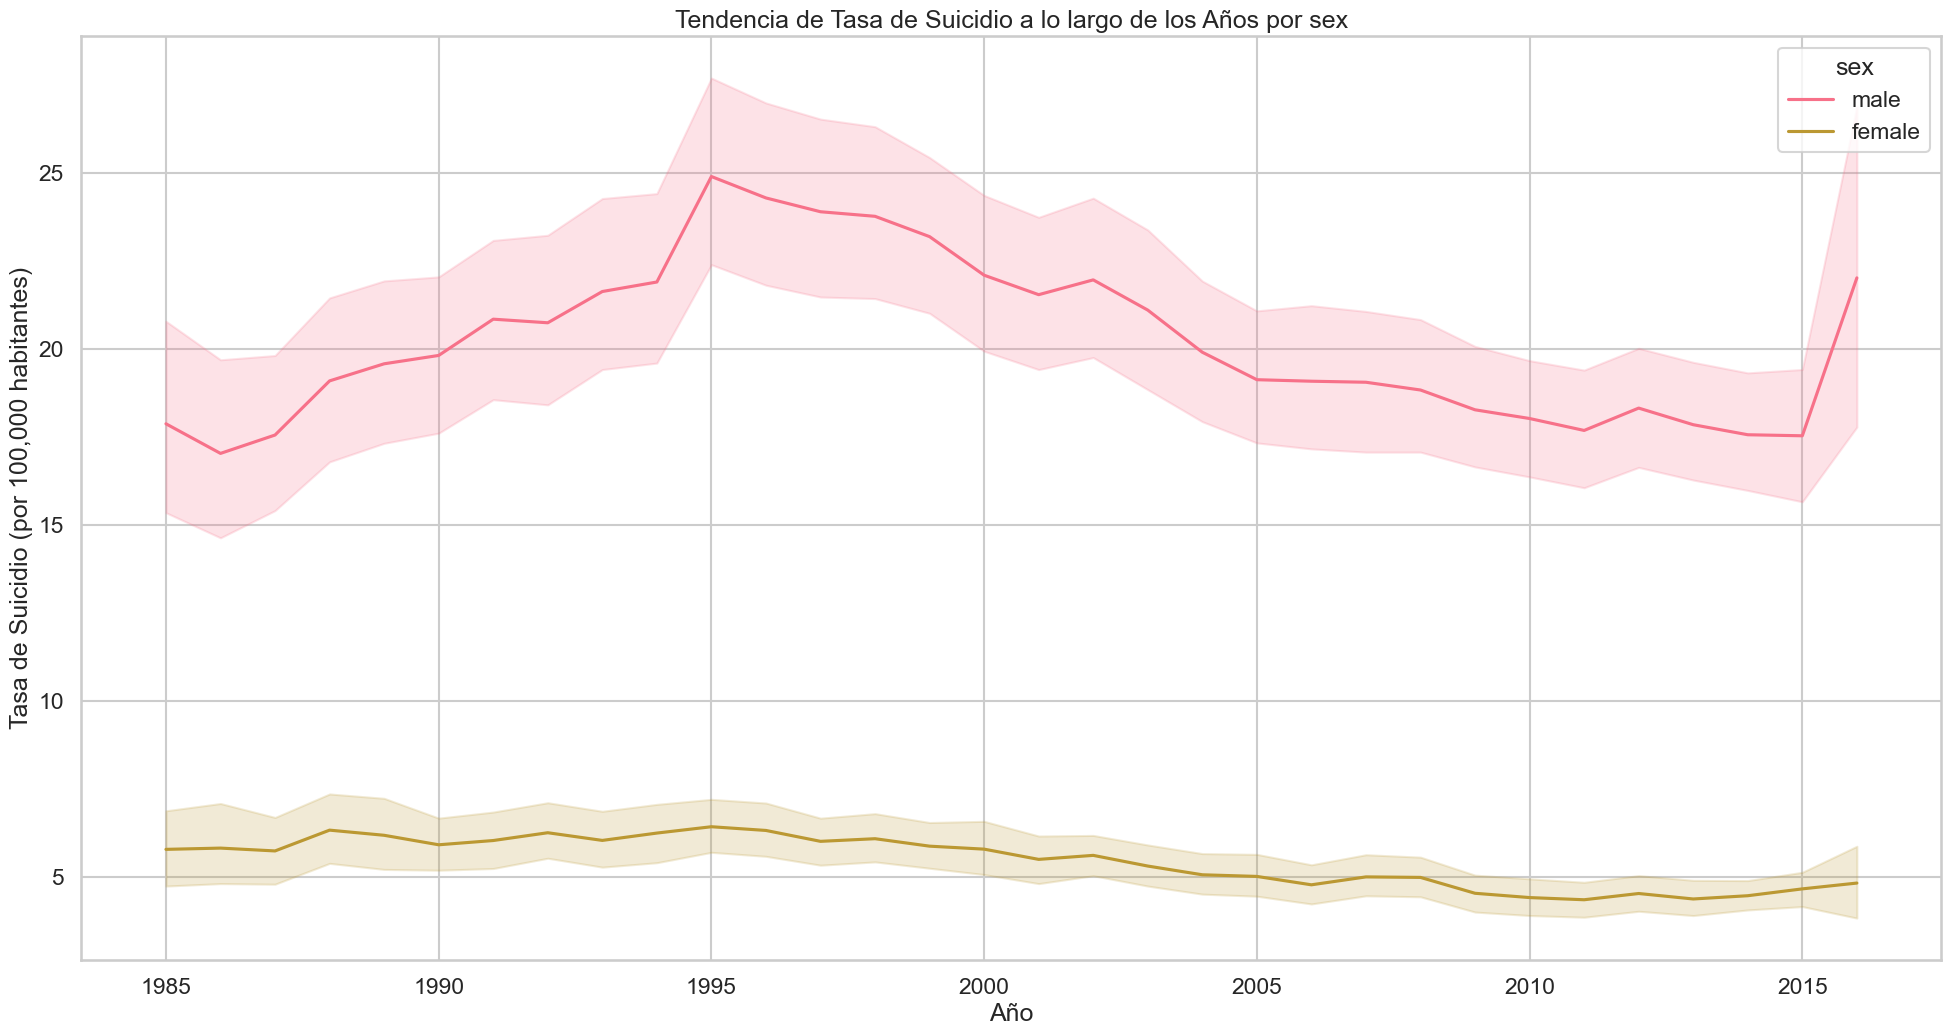

DataFrame de resúmenes de estadísticas descriptivas para hombres (sex):


count       mean        std  min     25%     50%      75%     max
year sex                                                                    
1985 male  288.0  17.875486  23.947288  0.0  0.6900  10.085  23.9125  144.65
1986 male  288.0  17.033993  21.365299  0.0  0.7850   9.635  23.8100  123.72
1987 male  324.0  17.556296  20.810102  0.0  1.2175  10.545  26.2375  131.87
1988 male  294.0  19.095408  20.609586  0.0  3.6575  13.920  27.8500  138.89
1989 male  312.0  19.581314  20.990930  0.0  4.5225  14.360  28.0400  122.41
1990 male  384.0  19.818906  21.763991  0.0  3.1150  14.190  27.3650  150.00
1991 male  384.0  20.849792  23.568952  0.0  3.1650  14.390  29.2125  176.91
1992 male  390.0  20.747462  23.343777  0.0  3.1900  14.905  28.3550  177.61
1993 male  390.0  21.636154  24.525221  0.0  3.5850  14.880  28.7275  177.57
1994 male  408.0  21.906520  25.273440  0.0  2.9425  14.510  29.1325  176.26
1995 male  468.0  24.905256  29.914628  0.0  3.7575  16.370  32.5300  224.97
1996 male  462.0  24.296472  27.701921  0.0  4.2475  15.870  32.3500  151.33
1997 male  462.0  23.903983  27.582328  0.0  3.5100  14.870  32.2350  161.92
1998 male  474.0  23.774198  26.739678  0.0  3.0300  15.950  30.9725  125.78
1999 male  498.0  23.196305  26.404332  0.0  2.8725  15.545  31.2100  162.67
2000 male  516.0  22.099651  26.289207  0.0  1.5825  14.065  29.4475  144.15
2001 male  528.0  21.546345  24.892395  0.0  1.9475  14.450  28.4125  144.71
2002 male  516.0  21.966996  25.800009  0.0  2.4600  14.610  28.8000  157.48
2003 male  516.0  21.107655  24.730540  0.0  1.8900  14.195  27.8475  170.86
2004 male  504.0  19.909762  23.064053  0.0  1.8625  13.875  26.5500  172.80
2005 male  504.0  19.129286  22.499085  0.0  1.9325  12.980  26.0250  176.33
2006 male  510.0  19.085863  23.337862  0.0  1.4700  12.675  25.5700  204.92
2007 male  516.0  19.056667  22.418829  0.0  2.2125  12.550  25.6925  172.86
2008 male  510.0  18.835961  21.600603  0.0  1.7675  12.865  25.5725  154.92
2009 male  534.0  18.273333  21.148287  0.0  1.9125  12.085  25.2100  173.86
2010 male  528.0  18.025682  21.039596  0.0  1.9600  11.860  25.7425  182.32
2011 male  516.0  17.686376  20.334941  0.0  2.2000  12.755  24.2625  185.37
2012 male  486.0  18.321811  20.898820  0.0  2.9725  13.085  25.6950  187.06
2013 male  480.0  17.849708  19.496595  0.0  2.5550  12.685  24.0075  147.59
2014 male  468.0  17.564124  18.721957  0.0  2.8975  12.235  24.9450  124.45
2015 male  372.0  17.534677  18.719036  0.0  3.5525  12.960  24.8625  140.74
2016 male   80.0  22.023750  20.410865  0.0  8.5400  18.480  26.7925   96.98

DataFrame de resúmenes de estadísticas descriptivas para mujeres (sex):


count      mean        std  min     25%    50%     75%     max
year sex                                                                   
1985 female  288.0  5.776910   9.638487  0.0  0.0000  2.270  7.4125   77.55
1986 female  288.0  5.812674  10.158646  0.0  0.0450  2.885  7.9400  115.38
1987 female  324.0  5.732130   8.381871  0.0  0.1600  3.200  7.6850   57.76
1988 female  294.0  6.323401   9.218088  0.0  0.3725  3.560  8.5000   84.91
1989 female  312.0  6.176827   8.852603  0.0  0.3825  3.935  8.5275   98.51
1990 female  384.0  5.907005   7.722798  0.0  0.3175  3.890  7.7275   64.97
1991 female  384.0  6.027969   8.136154  0.0  0.4200  3.605  7.7300   72.44
1992 female  390.0  6.249667   8.045520  0.0  0.5400  4.180  8.3925   60.74
1993 female  390.0  6.031256   7.863752  0.0  0.5425  3.745  7.9400   59.08
1994 female  408.0  6.240025   8.526646  0.0  0.5275  3.770  8.5875   65.37
1995 female  468.0  6.420085   8.327353  0.0  0.5650  3.905  8.4700   59.01
1996 female  462.0  6.314372   7.997835  0.0  0.6350  3.835  8.5050   63.02
1997 female  462.0  6.004740   7.430540  0.0  0.5825  3.895  8.3750   53.84
1998 female  474.0  6.079641   7.678505  0.0  0.5850  3.530  8.2550   50.38
1999 female  498.0  5.867771   7.396422  0.0  0.5000  3.550  8.0775   55.85
2000 female  516.0  5.783004   9.086969  0.0  0.2925  3.220  7.7800  133.42
2001 female  528.0  5.491932   8.041081  0.0  0.3100  2.990  7.4350  102.46
2002 female  516.0  5.606105   6.926651  0.0  0.4900  3.595  7.9225   61.28
2003 female  516.0  5.302384   6.901402  0.0  0.3775  3.400  7.4025   71.26
2004 female  504.0  5.054127   6.697448  0.0  0.3775  2.955  6.9650   78.01
2005 female  504.0  5.007599   6.720423  0.0  0.3050  3.040  7.0425   74.24
2006 female  510.0  4.769059   6.580872  0.0  0.2225  2.580  6.7100   70.33
2007 female  516.0  4.994012   6.727324  0.0  0.4250  2.830  6.7700   70.58
2008 female  510.0  4.979412   6.622414  0.0  0.4700  2.970  7.2900   67.53
2009 female  534.0  4.528240   6.237691  0.0  0.3625  2.480  6.3375   77.22
2010 female  528.0  4.406117   6.237371  0.0  0.3700  2.690  6.3350   71.69
2011 female  516.0  4.344322   5.699717  0.0  0.3775  2.475  6.2025   65.70
2012 female  486.0  4.521626   5.628286  0.0  0.5150  2.650  6.5075   61.40
2013 female  480.0  4.366208   5.519201  0.0  0.4100  2.540  6.4650   53.30
2014 female  468.0  4.458803   4.874627  0.0  0.7900  3.105  6.2500   44.31
2015 female  372.0  4.653468   5.071137  0.0  0.9475  3.150  6.7325   43.57
2016 female   80.0  4.818625   4.561187  0.0  1.3000  3.610  7.3325   23.03

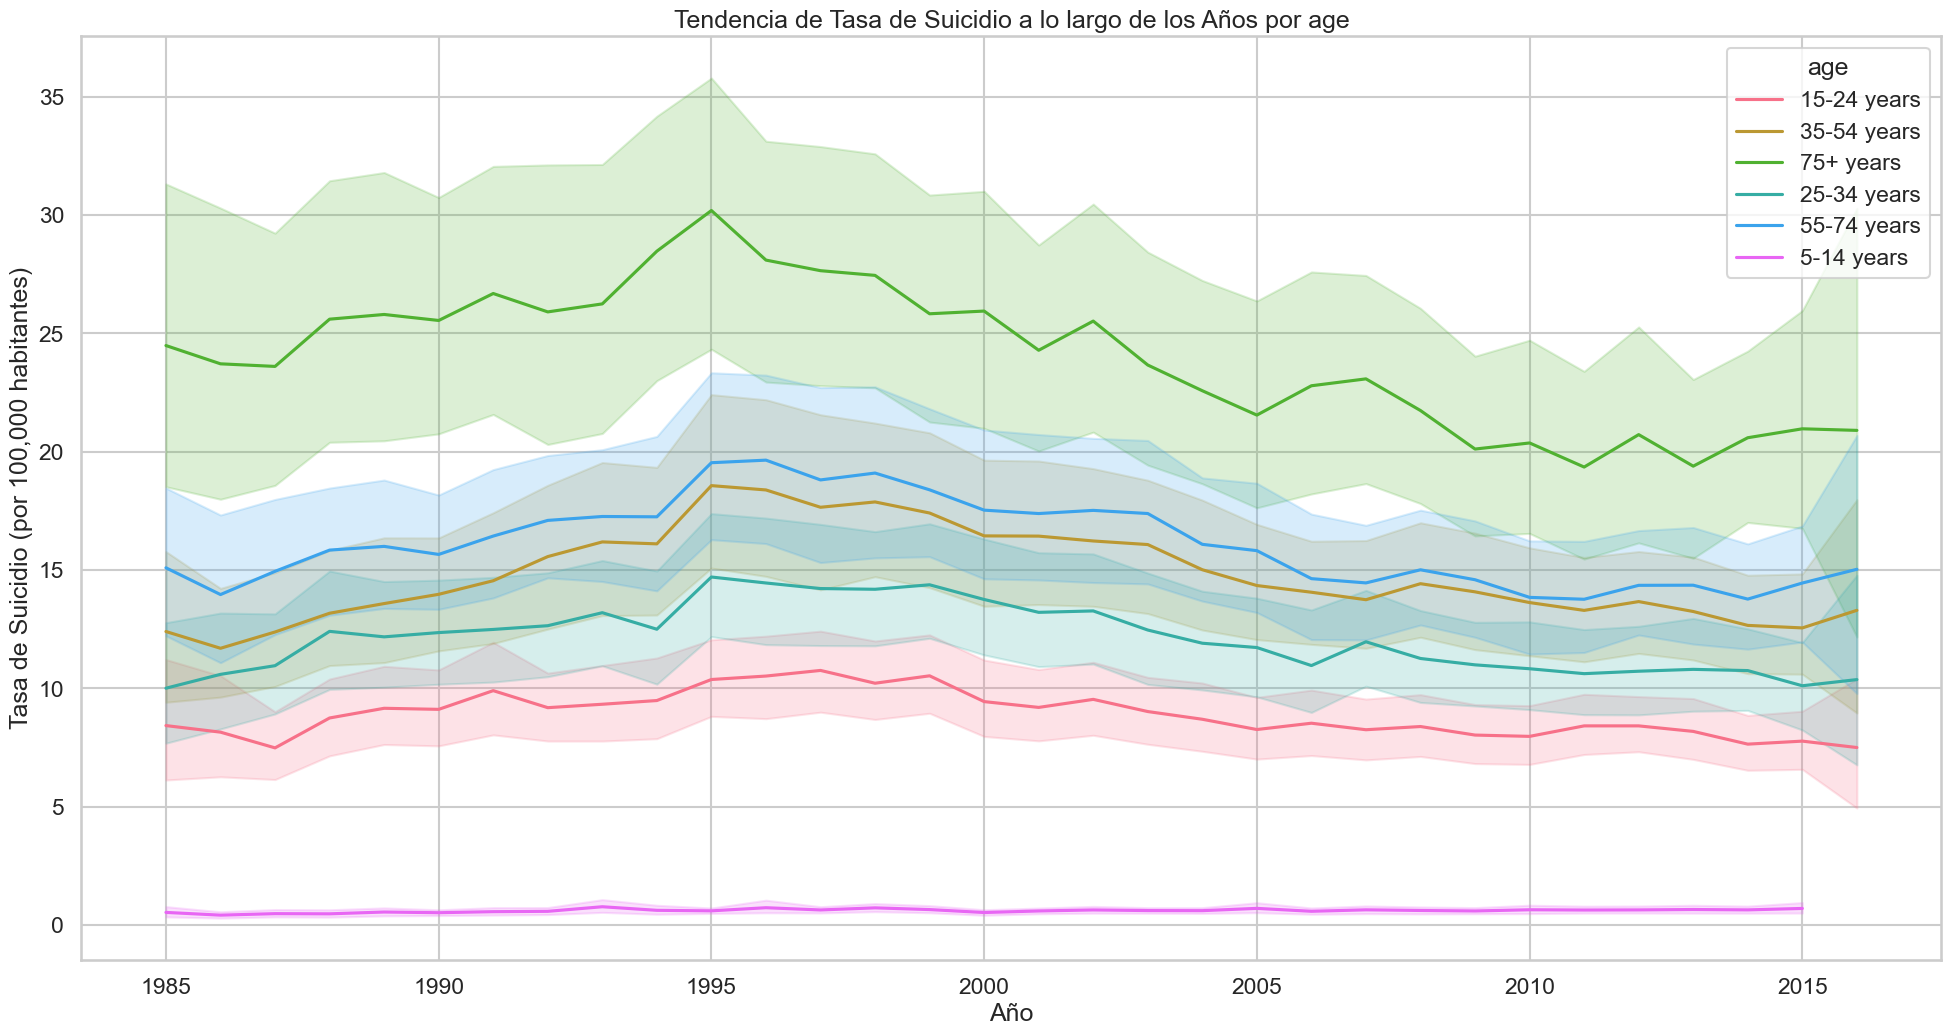

DataFrame de resúmenes de estadísticas descriptivas para el grupo de edad 15-24 years (age):


count       mean        std  min     25%    50%      75%  \
year age                                                                     
1985 15-24 years   96.0   8.429688  12.418020  0.0  1.3450  4.590  10.6475   
1986 15-24 years   96.0   8.152083  10.591468  0.0  2.5250  5.525   9.2175   
1987 15-24 years  108.0   7.487870   7.750207  0.0  2.2700  5.360   9.3375   
1988 15-24 years   98.0   8.750918   8.476335  0.0  2.7150  6.635  11.3050   
1989 15-24 years  104.0   9.160481   9.052833  0.0  3.4850  6.455  11.4300   
1990 15-24 years  128.0   9.115156   9.194314  0.0  3.2250  6.095  13.1575   
1991 15-24 years  128.0   9.905625  11.466920  0.0  2.6475  6.155  12.8475   
1992 15-24 years  130.0   9.186538   8.604855  0.0  2.6550  6.695  13.7600   
1993 15-24 years  130.0   9.331000   9.609016  0.0  2.5925  5.965  13.1625   
1994 15-24 years  136.0   9.487721   9.853929  0.0  2.9175  6.110  12.3650   
1995 15-24 years  156.0  10.376474  10.326094  0.0  3.5975  7.220  14.1300   
1996 15-24 years  154.0  10.521948  10.730130  0.0  2.8700  7.345  14.3825   
1997 15-24 years  154.0  10.759675  11.352866  0.0  3.5400  6.790  13.2900   
1998 15-24 years  158.0  10.219114  10.580032  0.0  2.8500  6.885  13.3900   
1999 15-24 years  166.0  10.532289  11.169958  0.0  2.7350  6.825  14.1550   
2000 15-24 years  172.0   9.442733  10.843378  0.0  1.9925  5.750  13.8800   
2001 15-24 years  176.0   9.197273  10.286786  0.0  2.3125  5.945  13.0625   
2002 15-24 years  172.0   9.537093  10.219330  0.0  2.7300  6.420  13.3900   
2003 15-24 years  172.0   9.022500   9.591575  0.0  2.4425  6.115  12.3250   
2004 15-24 years  168.0   8.696726   9.382108  0.0  2.2750  5.860  12.1775   
2005 15-24 years  168.0   8.263036   8.779497  0.0  2.3425  5.400  11.8450   
2006 15-24 years  170.0   8.529941   9.563001  0.0  1.7975  5.230  12.2825   
2007 15-24 years  172.0   8.254419   8.865683  0.0  2.0425  5.010  11.6250   
2008 15-24 years  170.0   8.389588   9.263491  0.0  2.0600  5.060  12.2150   
2009 15-24 years  178.0   8.029101   8.721913  0.0  1.9475  5.385  10.4075   
2010 15-24 years  176.0   7.973750   8.739047  0.0  2.1225  4.935  10.5250   
2011 15-24 years  172.0   8.417209   8.479886  0.0  2.6350  5.570  11.6325   
2012 15-24 years  162.0   8.417284   7.995013  0.0  2.4975  6.385  11.7500   
2013 15-24 years  160.0   8.184062   8.658454  0.0  2.0650  5.950  11.3875   
2014 15-24 years  156.0   7.645833   7.283439  0.0  2.5550  5.510  10.6250   
2015 15-24 years  124.0   7.773226   7.019357  0.0  2.7800  5.420  11.1500   
2016 15-24 years   32.0   7.502500   8.070363  0.0  2.1875  4.470  10.4150   

                    max  
year age                 
1985 15-24 years  85.59  
1986 15-24 years  76.60  
1987 15-24 years  37.93  
1988 15-24 years  39.58  
1989 15-24 years  50.39  
1990 15-24 years  50.89  
1991 15-24 years  73.65  
1992 15-24 years  39.33  
1993 15-24 years  45.56  
1994 15-24 years  49.22  
1995 15-24 years  53.69  
1996 15-24 years  57.05  
1997 15-24 years  56.96  
1998 15-24 years  51.89  
1999 15-24 years  54.48  
2000 15-24 years  59.83  
2001 15-24 years  60.14  
2002 15-24 years  61.17  
2003 15-24 years  50.05  
2004 15-24 years  49.66  
2005 15-24 years  46.53  
2006 15-24 years  44.31  
2007 15-24 years  44.32  
2008 15-24 years  47.09  
2009 15-24 years  45.99  
2010 15-24 years  40.82  
2011 15-24 years  43.53  
2012 15-24 years  40.24  
2013 15-24 years  47.14  
2014 15-24 years  44.56  
2015 15-24 years  34.94  
2016 15-24 years  33.62

DataFrame de resúmenes de estadísticas descriptivas para el grupo de edad 35-54 years (age):


count       mean        std  min     25%     50%      75%  \
year age                                                                      
1985 35-54 years   96.0  12.403021  15.686395  0.0  2.3750   7.495  16.8800   
1986 35-54 years   96.0  11.695417  12.002835  0.0  2.1075   7.930  17.5575   
1987 35-54 years  108.0  12.383611  12.648021  0.0  3.4575   8.260  16.8800   
1988 35-54 years   98.0  13.176020  12.615646  0.0  4.2575   9.345  18.4600   
1989 35-54 years  104.0  13.584519  13.787185  0.0  4.1775   9.425  19.3325   
1990 35-54 years  128.0  13.975234  13.908495  0.0  4.6650   9.815  19.8175   
1991 35-54 years  128.0  14.548906  15.668368  0.0  4.1775   9.385  20.5700   
1992 35-54 years  130.0  15.569077  17.057982  0.0  4.2650  10.810  19.9400   
1993 35-54 years  130.0  16.188846  18.530613  0.0  3.9625   9.275  21.3200   
1994 35-54 years  136.0  16.106691  18.758215  0.0  4.1000   9.475  21.5825   
1995 35-54 years  156.0  18.566731  24.098061  0.0  4.1950  10.540  23.3650   
1996 35-54 years  154.0  18.384091  24.283953  0.0  4.3275  10.920  22.5075   
1997 35-54 years  154.0  17.652727  23.218513  0.0  4.0675  10.220  22.3700   
1998 35-54 years  158.0  17.877532  22.141924  0.0  4.0225  10.475  23.4925   
1999 35-54 years  166.0  17.409699  21.226963  0.0  3.6150  10.440  23.3050   
2000 35-54 years  172.0  16.443372  20.930260  0.0  3.7775  10.065  22.4775   
2001 35-54 years  176.0  16.433750  20.605924  0.0  3.2925   9.720  22.6600   
2002 35-54 years  172.0  16.228721  20.224137  0.0  4.1450   9.105  20.4525   
2003 35-54 years  172.0  16.077151  19.469840  0.0  4.0650   9.235  20.6400   
2004 35-54 years  168.0  15.013095  17.359342  0.0  3.7350   9.035  21.2800   
2005 35-54 years  168.0  14.346131  16.399176  0.0  3.4050   9.335  20.1300   
2006 35-54 years  170.0  14.063176  15.621994  0.0  3.2250   8.715  20.0625   
2007 35-54 years  172.0  13.747326  15.627208  0.0  2.9350   8.415  19.2100   
2008 35-54 years  170.0  14.423941  15.861333  0.0  3.8700   9.125  19.2800   
2009 35-54 years  178.0  14.079663  16.292173  0.0  2.8175   8.525  20.4125   
2010 35-54 years  176.0  13.626648  15.710323  0.0  3.3000   7.935  20.1225   
2011 35-54 years  172.0  13.296105  14.768062  0.0  2.7625   8.125  20.1925   
2012 35-54 years  162.0  13.668086  14.503179  0.0  3.7550   8.715  18.4350   
2013 35-54 years  160.0  13.249437  14.585102  0.0  3.2400   8.365  19.6975   
2014 35-54 years  156.0  12.662372  12.932789  0.0  3.5675   8.460  18.7275   
2015 35-54 years  124.0  12.555645  12.026899  0.0  3.7200   8.825  19.1850   
2016 35-54 years   32.0  13.298438  14.297045  0.0  3.4975   8.870  20.4225   

                     max  
year age                  
1985 35-54 years   97.56  
1986 35-54 years   56.91  
1987 35-54 years   61.35  
1988 35-54 years   65.23  
1989 35-54 years   66.62  
1990 35-54 years   67.68  
1991 35-54 years   89.47  
1992 35-54 years   89.24  
1993 35-54 years  107.13  
1994 35-54 years  117.30  
1995 35-54 years  144.85  
1996 35-54 years  151.33  
1997 35-54 years  144.59  
1998 35-54 years  125.78  
1999 35-54 years  132.51  
2000 35-54 years  131.90  
2001 35-54 years  123.17  
2002 35-54 years  134.29  
2003 35-54 years  115.34  
2004 35-54 years  107.27  
2005 35-54 years  103.35  
2006 35-54 years   81.31  
2007 35-54 years   84.39  
2008 35-54 years   90.15  
2009 35-54 years   97.21  
2010 35-54 years   89.74  
2011 35-54 years   83.02  
2012 35-54 years   78.05  
2013 35-54 years   94.28  
2014 35-54 years   77.88  
2015 35-54 years   71.01  
2016 35-54 years   70.62

DataFrame de resúmenes de estadísticas descriptivas para el grupo de edad 75+ years (age):


count       mean        std  min     25%     50%      75%  \
year age                                                                    
1985 75+ years   96.0  24.484271  33.315494  0.0  0.0000  10.220  33.3325   
1986 75+ years   96.0  23.712187  31.209256  0.0  0.5175   9.705  36.3050   
1987 75+ years  108.0  23.602778  29.211946  0.0  0.5025  11.535  37.2525   
1988 75+ years   98.0  25.598878  29.541594  0.0  3.3400  14.270  36.1850   
1989 75+ years  104.0  25.797404  29.645841  0.0  4.6900  14.745  36.7850   
1990 75+ years  128.0  25.543906  30.213781  0.0  2.3200  14.825  35.5625   
1991 75+ years  128.0  26.682891  32.283730  0.0  2.7850  14.090  41.7200   
1992 75+ years  130.0  25.905923  31.348706  0.0  3.8000  14.445  35.9700   
1993 75+ years  130.0  26.244462  32.772923  0.0  2.6875  12.945  39.5625   
1994 75+ years  136.0  28.470956  32.943788  0.0  5.2050  16.795  41.4450   
1995 75+ years  156.0  30.188526  37.829437  0.0  3.0750  17.210  43.0950   
1996 75+ years  154.0  28.094286  31.929367  0.0  4.5200  15.605  39.1250   
1997 75+ years  154.0  27.646948  32.704165  0.0  3.5100  15.855  37.0575   
1998 75+ years  158.0  27.448734  31.419445  0.0  3.6225  15.865  37.7675   
1999 75+ years  166.0  25.826747  32.004174  0.0  2.7800  14.090  34.3850   
2000 75+ years  172.0  25.941221  32.771398  0.0  2.1250  12.015  34.7550   
2001 75+ years  176.0  24.285341  29.656865  0.0  2.0175  13.020  33.5425   
2002 75+ years  172.0  25.517849  31.811376  0.0  2.6225  13.480  31.4450   
2003 75+ years  172.0  23.661279  30.240644  0.0  1.3825  11.290  31.2700   
2004 75+ years  168.0  22.575179  29.233754  0.0  1.5700  12.795  29.9875   
2005 75+ years  168.0  21.546845  28.694707  0.0  0.6000  12.025  27.7225   
2006 75+ years  170.0  22.785588  31.350148  0.0  0.7650  10.975  29.3575   
2007 75+ years  172.0  23.076860  29.731998  0.0  1.8850  11.885  31.8900   
2008 75+ years  170.0  21.738529  28.030744  0.0  1.5350  11.285  29.1175   
2009 75+ years  178.0  20.112079  27.250616  0.0  1.3000  10.735  24.3300   
2010 75+ years  176.0  20.369261  27.811689  0.0  1.5500   9.325  27.3600   
2011 75+ years  172.0  19.351628  26.862005  0.0  0.6800  10.595  26.2825   
2012 75+ years  162.0  20.721235  28.694306  0.0  1.7700  10.780  25.2925   
2013 75+ years  160.0  19.389063  24.687132  0.0  2.0800  11.625  24.3450   
2014 75+ years  156.0  20.590256  24.866292  0.0  2.7350  11.775  28.1375   
2015 75+ years  124.0  20.967339  25.475229  0.0  2.6850  12.520  28.1500   
2016 75+ years   32.0  20.900625  26.384050  0.0  3.7425  12.105  22.7975   

                   max  
year age                
1985 75+ years  144.65  
1986 75+ years  123.72  
1987 75+ years  131.87  
1988 75+ years  138.89  
1989 75+ years  122.41  
1990 75+ years  150.00  
1991 75+ years  176.91  
1992 75+ years  177.61  
1993 75+ years  177.57  
1994 75+ years  176.26  
1995 75+ years  224.97  
1996 75+ years  144.23  
1997 75+ years  161.92  
1998 75+ years  125.66  
1999 75+ years  162.67  
2000 75+ years  144.15  
2001 75+ years  144.71  
2002 75+ years  157.48  
2003 75+ years  170.86  
2004 75+ years  172.80  
2005 75+ years  176.33  
2006 75+ years  204.92  
2007 75+ years  172.86  
2008 75+ years  154.92  
2009 75+ years  173.86  
2010 75+ years  182.32  
2011 75+ years  185.37  
2012 75+ years  187.06  
2013 75+ years  147.59  
2014 75+ years  124.45  
2015 75+ years  140.74  
2016 75+ years   96.98

DataFrame de resúmenes de estadísticas descriptivas para el grupo de edad 25-34 years (age):


count       mean        std  min     25%    50%      75%  \
year age                                                                     
1985 25-34 years   96.0  10.008750  13.093471  0.0  1.7825  5.995  12.7825   
1986 25-34 years   96.0  10.593854  11.962720  0.0  2.6925  7.620  13.5175   
1987 25-34 years  108.0  10.960370  11.147429  0.0  3.2050  7.680  15.0500   
1988 25-34 years   98.0  12.410102  11.896700  0.0  2.9375  9.280  17.1475   
1989 25-34 years  104.0  12.178173  11.719375  0.0  4.0550  8.960  16.0625   
1990 25-34 years  128.0  12.358828  12.552571  0.0  3.6600  7.615  17.2425   
1991 25-34 years  128.0  12.491484  13.019146  0.0  3.6075  7.530  17.5825   
1992 25-34 years  130.0  12.649231  13.378133  0.0  4.1825  7.790  18.2150   
1993 25-34 years  130.0  13.198615  13.746979  0.0  3.9225  7.945  17.9475   
1994 25-34 years  136.0  12.500147  14.382663  0.0  3.0400  8.070  16.7625   
1995 25-34 years  156.0  14.706090  17.054427  0.0  3.7625  8.565  21.2050   
1996 25-34 years  154.0  14.453831  16.541282  0.0  3.7550  7.915  19.8700   
1997 25-34 years  154.0  14.218571  16.459312  0.0  3.8075  8.650  18.8125   
1998 25-34 years  158.0  14.188291  16.165980  0.0  3.1050  8.050  20.3475   
1999 25-34 years  166.0  14.377349  16.936428  0.0  3.2750  8.100  20.1175   
2000 25-34 years  172.0  13.756919  16.434081  0.0  3.0325  7.830  19.5925   
2001 25-34 years  176.0  13.213466  16.149075  0.0  2.7875  7.220  18.9375   
2002 25-34 years  172.0  13.273488  15.673797  0.0  2.9750  7.435  18.2075   
2003 25-34 years  172.0  12.466337  15.693207  0.0  2.9800  6.885  16.5325   
2004 25-34 years  168.0  11.909048  14.487085  0.0  2.5750  6.335  17.3225   
2005 25-34 years  168.0  11.727024  14.195377  0.0  3.1850  6.215  15.4500   
2006 25-34 years  170.0  10.965000  13.987957  0.0  2.3725  5.875  15.3150   
2007 25-34 years  172.0  11.969942  13.968878  0.0  3.0125  6.230  16.3475   
2008 25-34 years  170.0  11.264353  13.268735  0.0  2.4900  6.435  15.4000   
2009 25-34 years  178.0  10.995337  12.725446  0.0  2.5650  5.795  15.1575   
2010 25-34 years  176.0  10.830852  12.692958  0.0  2.1575  5.770  14.9050   
2011 25-34 years  172.0  10.623314  12.595385  0.0  2.0975  5.935  15.3025   
2012 25-34 years  162.0  10.726296  11.888080  0.0  2.6900  5.890  15.0750   
2013 25-34 years  160.0  10.805125  12.744517  0.0  2.5125  6.185  14.9875   
2014 25-34 years  156.0  10.753205  11.184226  0.0  3.0425  6.615  14.2100   
2015 25-34 years  124.0  10.111774  10.181206  0.0  2.6575  6.840  13.7150   
2016 25-34 years   32.0  10.372500  12.166255  0.0  2.4175  5.055  15.0975   

                    max  
year age                 
1985 25-34 years  79.50  
1986 25-34 years  79.75  
1987 25-34 years  55.81  
1988 25-34 years  60.38  
1989 25-34 years  53.78  
1990 25-34 years  64.14  
1991 25-34 years  66.32  
1992 25-34 years  67.59  
1993 25-34 years  82.84  
1994 25-34 years  94.18  
1995 25-34 years  91.46  
1996 25-34 years  88.23  
1997 25-34 years  84.84  
1998 25-34 years  83.68  
1999 25-34 years  87.08  
2000 25-34 years  88.45  
2001 25-34 years  88.17  
2002 25-34 years  85.78  
2003 25-34 years  87.85  
2004 25-34 years  84.69  
2005 25-34 years  77.77  
2006 25-34 years  84.70  
2007 25-34 years  76.05  
2008 25-34 years  74.60  
2009 25-34 years  67.10  
2010 25-34 years  61.67  
2011 25-34 years  65.28  
2012 25-34 years  62.30  
2013 25-34 years  71.17  
2014 25-34 years  62.03  
2015 25-34 years  52.94  
2016 25-34 years  50.17

DataFrame de resúmenes de estadísticas descriptivas para el grupo de edad 55-74 years (age):


count       mean        std  min     25%     50%      75%  \
year age                                                                      
1985 55-74 years   96.0  15.094375  15.338457  0.0  2.5400   9.950  24.4875   
1986 55-74 years   96.0  13.965000  14.655398  0.0  1.0850   9.395  23.4650   
1987 55-74 years  108.0  14.945833  15.271877  0.0  3.2475   8.435  24.0250   
1988 55-74 years   98.0  15.843061  13.994559  0.0  4.8650  12.780  23.6700   
1989 55-74 years  104.0  16.000385  14.260104  0.0  5.9250  13.105  22.9125   
1990 55-74 years  128.0  15.660547  14.593807  0.0  4.0450  11.895  22.6000   
1991 55-74 years  128.0  16.436094  15.809624  0.0  5.1450  14.115  21.3125   
1992 55-74 years  130.0  17.097769  16.391140  0.0  5.3525  12.820  24.0900   
1993 55-74 years  130.0  17.262923  17.375984  0.0  5.2225  12.505  22.3325   
1994 55-74 years  136.0  17.249118  18.557183  0.0  5.2075  11.570  22.2525   
1995 55-74 years  156.0  19.534936  22.757917  0.0  4.6000  13.345  24.7900   
1996 55-74 years  154.0  19.642987  23.704649  0.0  4.6675  11.855  23.7350   
1997 55-74 years  154.0  18.807597  22.899151  0.0  3.7600  11.850  21.7700   
1998 55-74 years  158.0  19.098165  23.296001  0.0  3.1375  13.550  22.6675   
1999 55-74 years  166.0  18.389398  21.656753  0.0  3.9125  11.590  23.0950   
2000 55-74 years  172.0  17.531279  21.590218  0.0  2.4125  10.625  23.7000   
2001 55-74 years  176.0  17.387330  21.239518  0.0  2.9075  11.555  21.6425   
2002 55-74 years  172.0  17.520988  20.744818  0.0  3.2900  11.225  21.1200   
2003 55-74 years  172.0  17.388198  20.404494  0.0  3.4975  11.180  21.9775   
2004 55-74 years  168.0  16.086667  18.367031  0.0  2.3575  10.675  19.4425   
2005 55-74 years  168.0  15.819940  18.291353  0.0  2.5800  10.295  21.2550   
2006 55-74 years  170.0  14.636765  17.111141  0.0  2.5475   9.380  18.7625   
2007 55-74 years  172.0  14.457267  16.399891  0.0  3.1500   9.215  17.9300   
2008 55-74 years  170.0  15.010882  16.508864  0.0  2.8550   9.530  19.7600   
2009 55-74 years  178.0  14.590562  16.714191  0.0  2.6525   9.240  19.5775   
2010 55-74 years  176.0  13.846023  15.831126  0.0  2.8800   8.690  17.6700   
2011 55-74 years  172.0  13.766163  15.578759  0.0  3.3975   8.350  18.0475   
2012 55-74 years  162.0  14.354691  15.211323  0.0  3.3600  10.020  20.6275   
2013 55-74 years  160.0  14.360250  15.744997  0.0  2.9950   9.700  19.5400   
2014 55-74 years  156.0  13.773269  14.139160  0.0  3.4425   8.705  20.6725   
2015 55-74 years  124.0  14.451774  14.298922  0.0  4.2300  10.500  19.3850   
2016 55-74 years   32.0  15.031875  16.636514  0.0  3.2550  10.035  22.6975   

                     max  
year age                  
1985 55-74 years   65.15  
1986 55-74 years   66.75  
1987 55-74 years   61.22  
1988 55-74 years   56.84  
1989 55-74 years   66.60  
1990 55-74 years   66.83  
1991 55-74 years   85.84  
1992 55-74 years   87.02  
1993 55-74 years   94.73  
1994 55-74 years  103.86  
1995 55-74 years  118.53  
1996 55-74 years  121.81  
1997 55-74 years  105.76  
1998 55-74 years  123.83  
1999 55-74 years  102.44  
2000 55-74 years  117.37  
2001 55-74 years  116.49  
2002 55-74 years  103.28  
2003 55-74 years  105.08  
2004 55-74 years   99.31  
2005 55-74 years  106.39  
2006 55-74 years   88.29  
2007 55-74 years   82.29  
2008 55-74 years   73.41  
2009 55-74 years   90.70  
2010 55-74 years   83.30  
2011 55-74 years   81.21  
2012 55-74 years   74.09  
2013 55-74 years   83.89  
2014 55-74 years   75.66  
2015 55-74 years   78.90  
2016 55-74 years   76.32

DataFrame de resúmenes de estadísticas descriptivas para el grupo de edad 5-14 years (age):


count      mean       std  min  25%    50%     75%    max
year age                                                                  
1985 5-14 years   96.0  0.537083  1.139605  0.0  0.0  0.270  0.5400   9.22
1986 5-14 years   96.0  0.421458  0.696453  0.0  0.0  0.220  0.4925   4.61
1987 5-14 years  108.0  0.484815  0.811336  0.0  0.0  0.250  0.5500   4.59
1988 5-14 years   98.0  0.477449  0.859217  0.0  0.0  0.230  0.5625   6.54
1989 5-14 years  104.0  0.553462  0.932862  0.0  0.0  0.320  0.5775   4.83
1990 5-14 years  128.0  0.524062  0.683204  0.0  0.0  0.300  0.7425   3.13
1991 5-14 years  128.0  0.568281  0.893501  0.0  0.0  0.250  0.6425   4.85
1992 5-14 years  130.0  0.582846  0.821068  0.0  0.0  0.335  0.7675   4.55
1993 5-14 years  130.0  0.776385  1.536250  0.0  0.0  0.320  0.8100  10.62
1994 5-14 years  136.0  0.625000  1.120958  0.0  0.0  0.320  0.7750  10.40
1995 5-14 years  156.0  0.603269  0.753633  0.0  0.0  0.340  0.8825   4.50
1996 5-14 years  154.0  0.735390  1.663066  0.0  0.0  0.370  0.9725  18.92
1997 5-14 years  154.0  0.640649  0.800633  0.0  0.0  0.345  0.9875   4.70
1998 5-14 years  158.0  0.729684  1.102347  0.0  0.0  0.430  0.8700   9.13
1999 5-14 years  166.0  0.656747  1.008950  0.0  0.0  0.345  0.7825   8.51
2000 5-14 years  172.0  0.532442  0.803353  0.0  0.0  0.265  0.7850   5.77
2001 5-14 years  176.0  0.597670  0.832104  0.0  0.0  0.330  0.8200   4.41
2002 5-14 years  172.0  0.641163  0.972281  0.0  0.0  0.340  0.8425   6.10
2003 5-14 years  172.0  0.614651  0.805159  0.0  0.0  0.385  0.8800   4.90
2004 5-14 years  168.0  0.610952  0.793120  0.0  0.0  0.370  0.9025   4.33
2005 5-14 years  168.0  0.707679  1.373064  0.0  0.0  0.340  0.9075  14.33
2006 5-14 years  170.0  0.584294  0.894772  0.0  0.0  0.295  0.7400   5.51
2007 5-14 years  172.0  0.646221  1.070091  0.0  0.0  0.275  0.8550   7.40
2008 5-14 years  170.0  0.618824  1.013488  0.0  0.0  0.310  0.8200   6.95
2009 5-14 years  178.0  0.597978  0.914435  0.0  0.0  0.330  0.8275   7.12
2010 5-14 years  176.0  0.648864  1.242529  0.0  0.0  0.325  0.8825  10.04
2011 5-14 years  172.0  0.637674  0.925520  0.0  0.0  0.310  0.9350   5.24
2012 5-14 years  162.0  0.642716  1.005088  0.0  0.0  0.370  0.8225   7.36
2013 5-14 years  160.0  0.659812  1.017274  0.0  0.0  0.345  0.9100   7.62
2014 5-14 years  156.0  0.643846  0.939213  0.0  0.0  0.335  0.8175   5.22
2015 5-14 years  124.0  0.704677  1.289157  0.0  0.0  0.400  0.9425  11.02

In [157]:
# Gráfico de Líneas Temporales
summary_results = {}

for hue in categorical_cols[1:-1]:
    plt.figure(figsize=(24, 12))
    sns.lineplot(x="year", y="suicides/100k pop", hue=hue, data=datos)
    plt.title(f"Tendencia de Tasa de Suicidio a lo largo de los Años por {hue}")
    plt.xlabel("Año")
    plt.ylabel("Tasa de Suicidio (por 100,000 habitantes)")
    plt.show()

    # Calcular estadísticas descriptivas
    grouped_data = datos.groupby(['year', hue])['suicides/100k pop']
    summary = grouped_data.describe()

    # Almacena el resumen en el diccionario
    summary_results[hue] = summary

    # Verificar si la columna 'sex' está en el diccionario, dividir en dos DataFrames
    if 'sex' in hue:
        male_summary = summary_results[hue][summary_results[hue].index.get_level_values(hue) == 'male']
        female_summary = summary_results[hue][summary_results[hue].index.get_level_values(hue) == 'female']

        # Imprimir el DataFrame para hombres
        print(f"DataFrame de resúmenes de estadísticas descriptivas para hombres ({hue}):")
        display(male_summary)

        # Imprimir el DataFrame para mujeres
        print(f"DataFrame de resúmenes de estadísticas descriptivas para mujeres ({hue}):")
        display(female_summary)

    # Verificar si la columna 'age' está en el diccionario, crear un DataFrame para cada grupo de edad
    if 'age' in hue:
        age_groups = datos['age'].unique()
        for age_group in age_groups:
            age_summary = summary_results[hue][summary_results[hue].index.get_level_values(hue) == age_group]

            # Imprimir el DataFrame para el grupo de edad actual
            print(f"DataFrame de resúmenes de estadísticas descriptivas para el grupo de edad {age_group} ({hue}):")
            display(age_summary)

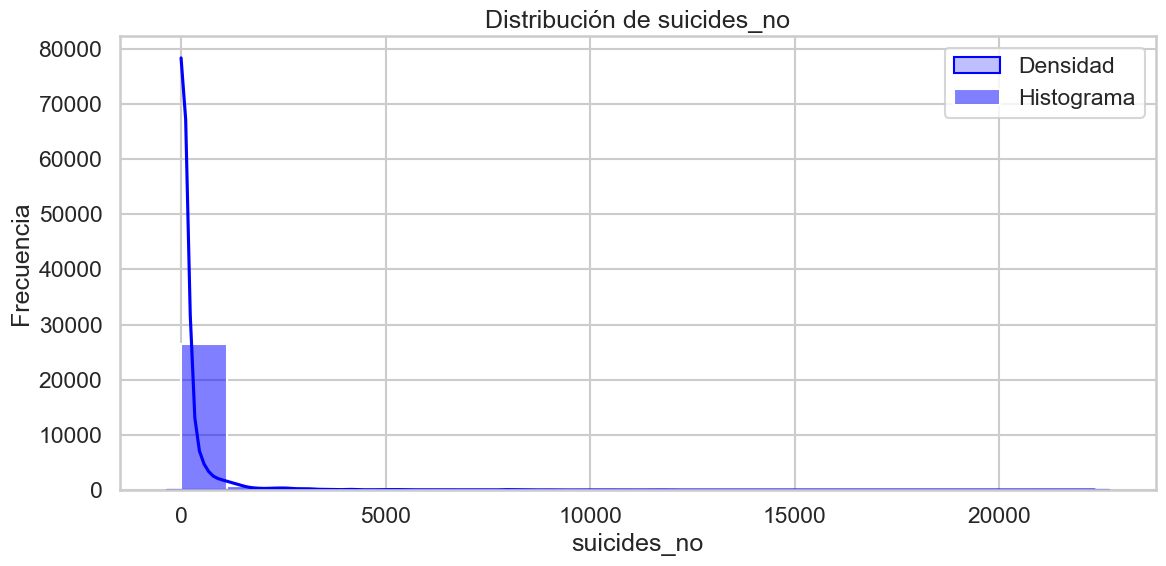

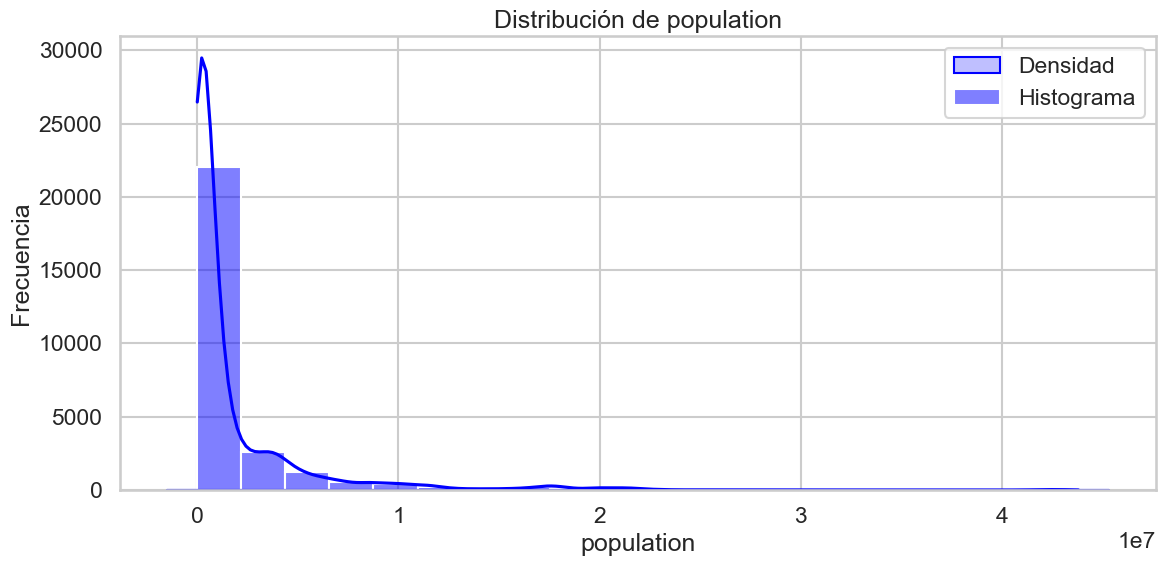

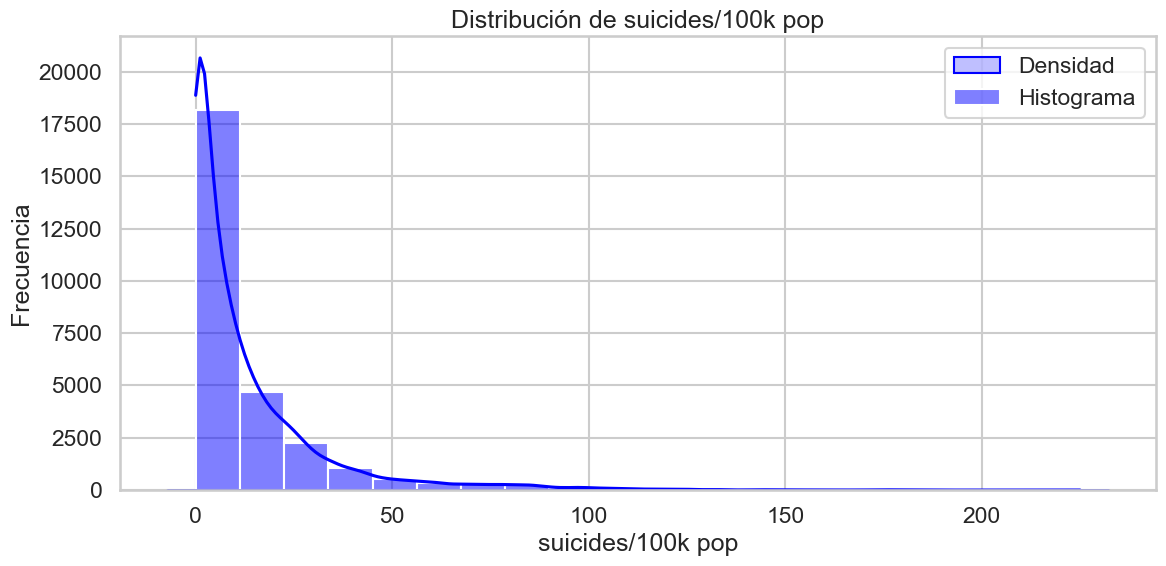

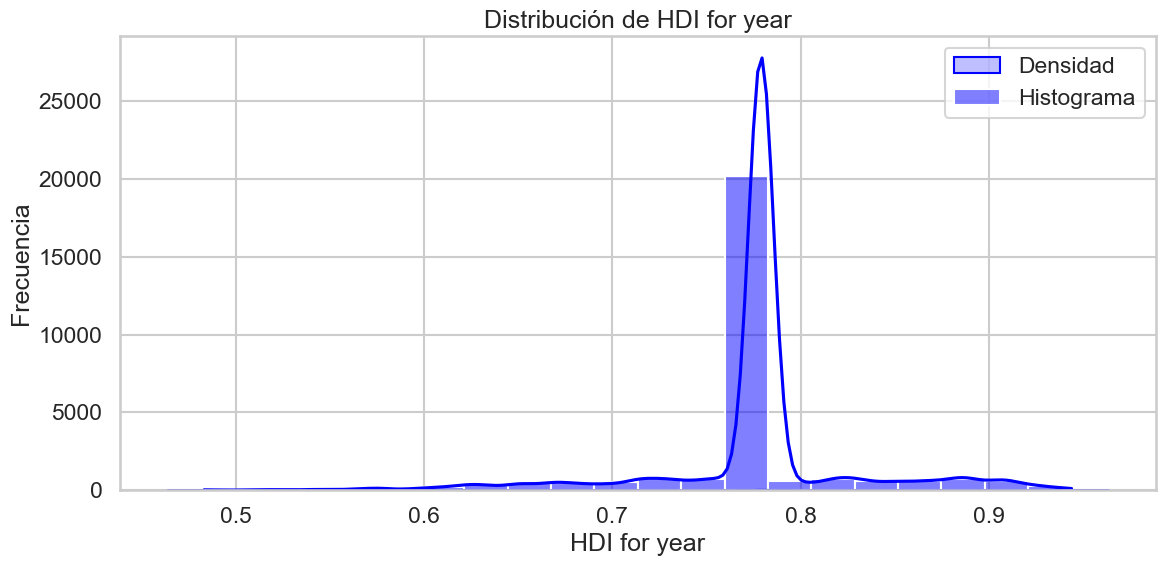

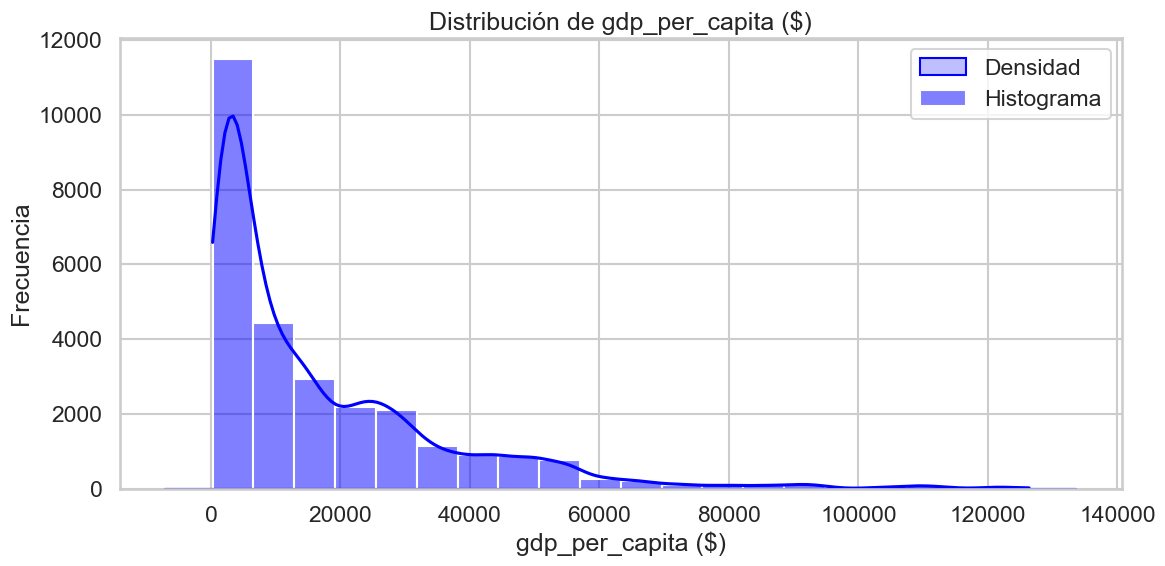

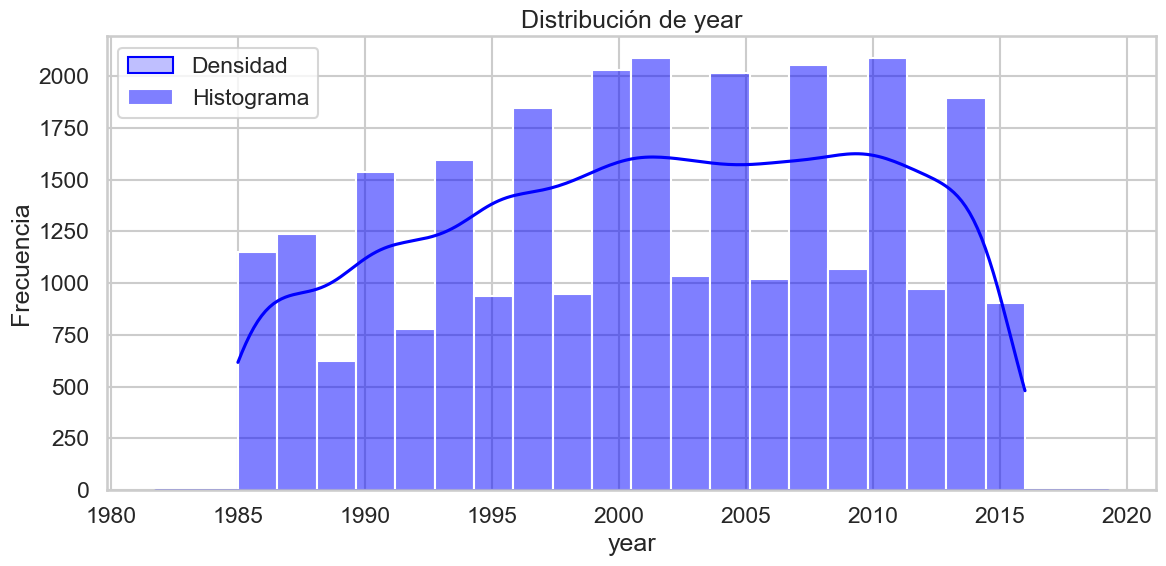

Tabla de estadísticas descriptivas para los histogramas:


Media     Mediana  Desviación Estándar    Mínimo  \
suicides_no         2.425744e+02      25.000         9.020479e+02     0.000   
population          1.844794e+06  430150.000         3.911779e+06   278.000   
suicides/100k pop   1.281610e+01       5.990         1.896151e+01     0.000   
HDI for year        7.782788e-01       0.779         5.120385e-02     0.483   
gdp_per_capita ($)  1.686646e+04    9372.000         1.888758e+04   251.000   
year                2.001258e+03    2002.000         8.469055e+00  1985.000   

                          Máximo  
suicides_no         2.233800e+04  
population          4.380521e+07  
suicides/100k pop   2.249700e+02  
HDI for year        9.440000e-01  
gdp_per_capita ($)  1.263520e+05  
year                2.016000e+03

In [164]:
# Crear subplots para cada columna numérica con un histograma y una curva de densidad
for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(datos[col], bins=20, kde=True, color='blue', label='Histograma')
    sns.kdeplot(datos[col], color='blue', label='Densidad', fill=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Crear un diccionario para almacenar estadísticas descriptivas
summary_stats = {}

# Calcular estadísticas descriptivas para cada columna numérica
for col in numeric_cols:
    stats = {
        'Media': datos[col].mean(),
        'Mediana': datos[col].median(),
        'Desviación Estándar': datos[col].std(),
        'Mínimo': datos[col].min(),
        'Máximo': datos[col].max()
    }
    summary_stats[col] = stats

# Crear DataFrames a partir del diccionario de estadísticas
histogram_summary = pd.DataFrame(summary_stats).T

# Mostrar la tabla de estadísticas para los histogramas
print("Tabla de estadísticas descriptivas para los histogramas:")
display(histogram_summary)


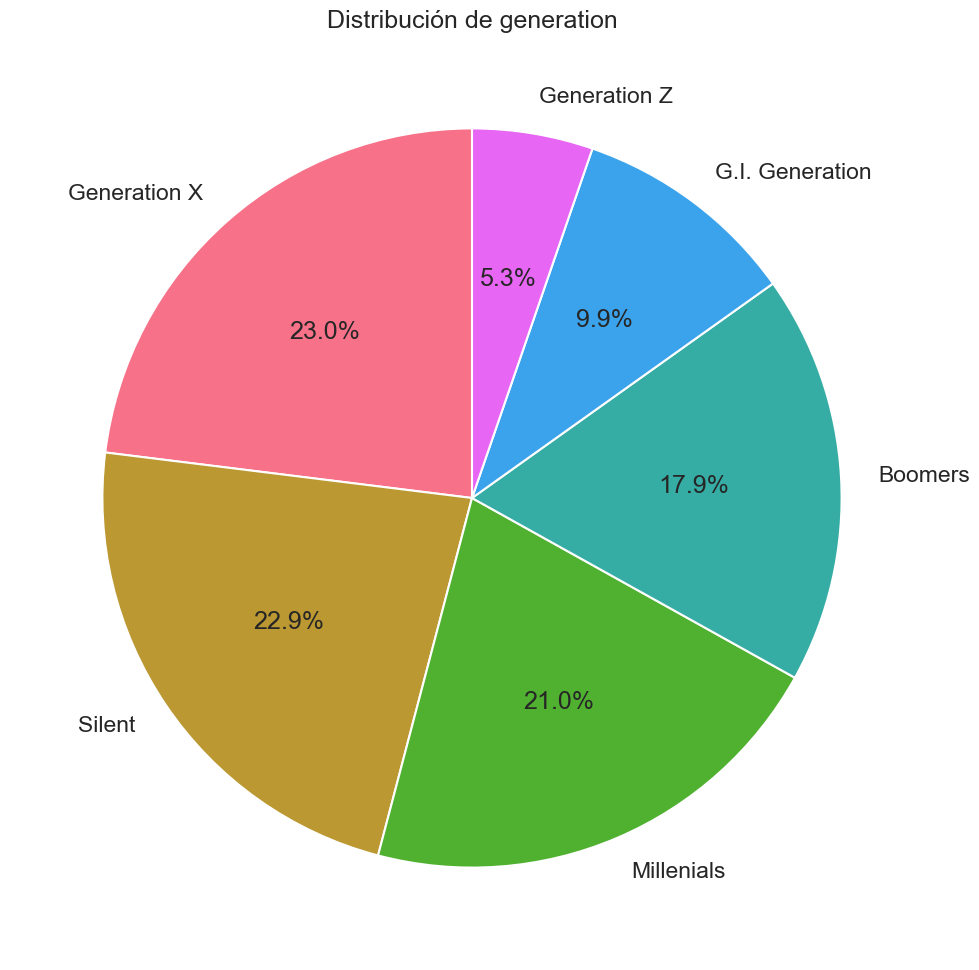

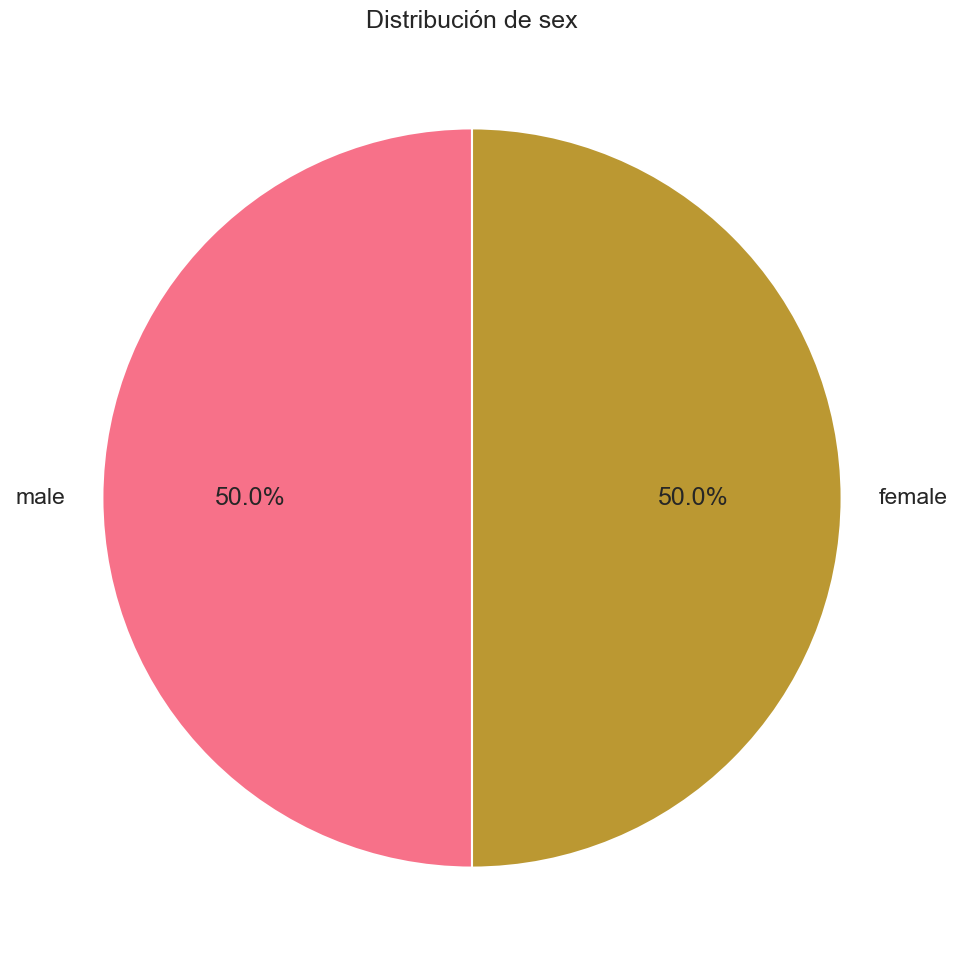

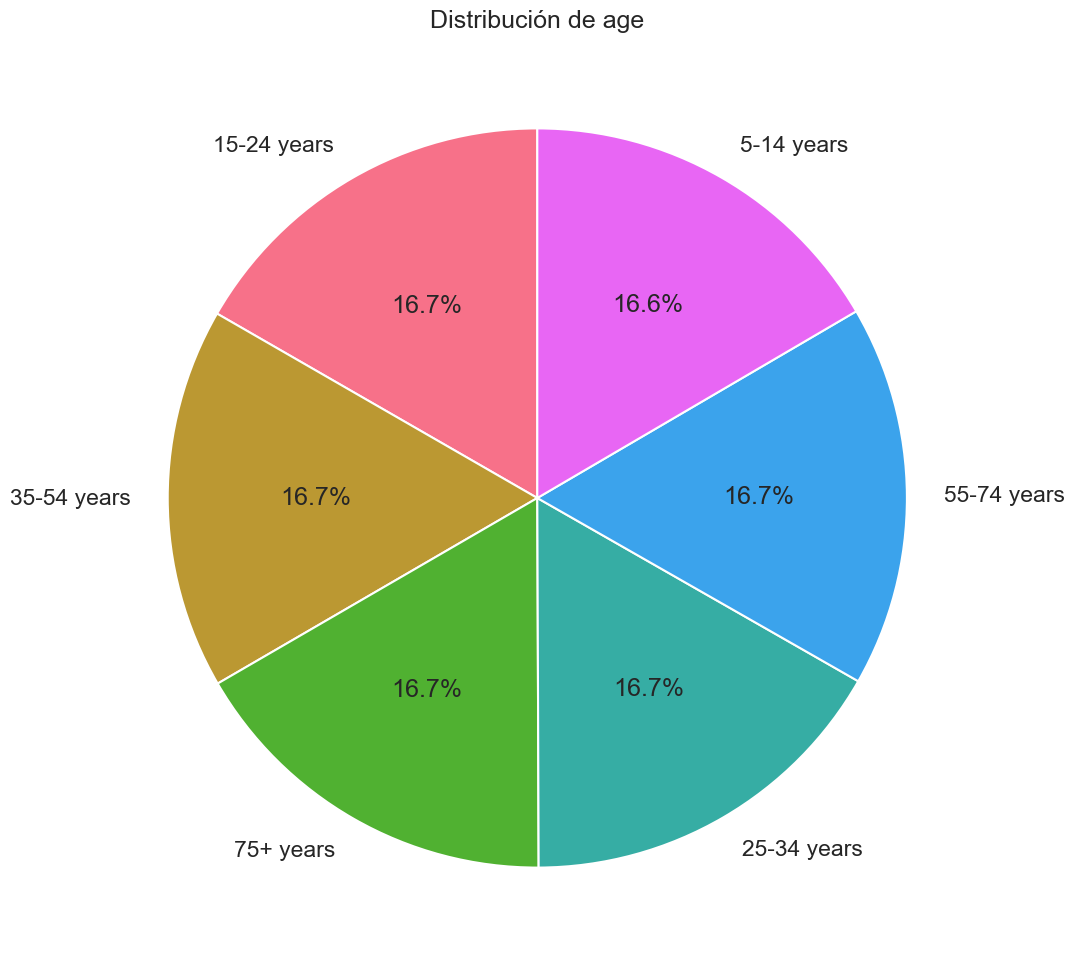

Tablas de resumen de variables categóricas:


generation
Generation X           6408
Silent                 6364
Millenials             5844
Boomers                4990
G.I. Generation        2744
Generation Z           1470

sex
male    13910
female  13910

age
15-24 years  4642
35-54 years  4642
75+ years    4642
25-34 years  4642
55-74 years  4642
5-14 years   4610

In [167]:
# Diccionario para almacenar resúmenes de variables categóricas
categorical_summary = {}

# Gráfico de Tarta
for col in categorical_cols[:-1]:
    plt.figure(figsize=(12, 12))
    datos[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f"Distribución de {col}")
    plt.ylabel("")
    plt.show()

    # Calcular el resumen de valores
    value_counts = datos[col].value_counts()
    categorical_summary[col] = value_counts

# Mostrar las tablas de resumen de variables categóricas
print("Tablas de resumen de variables categóricas:")
for col, summary in categorical_summary.items():
    
    display(pd.DataFrame(summary))

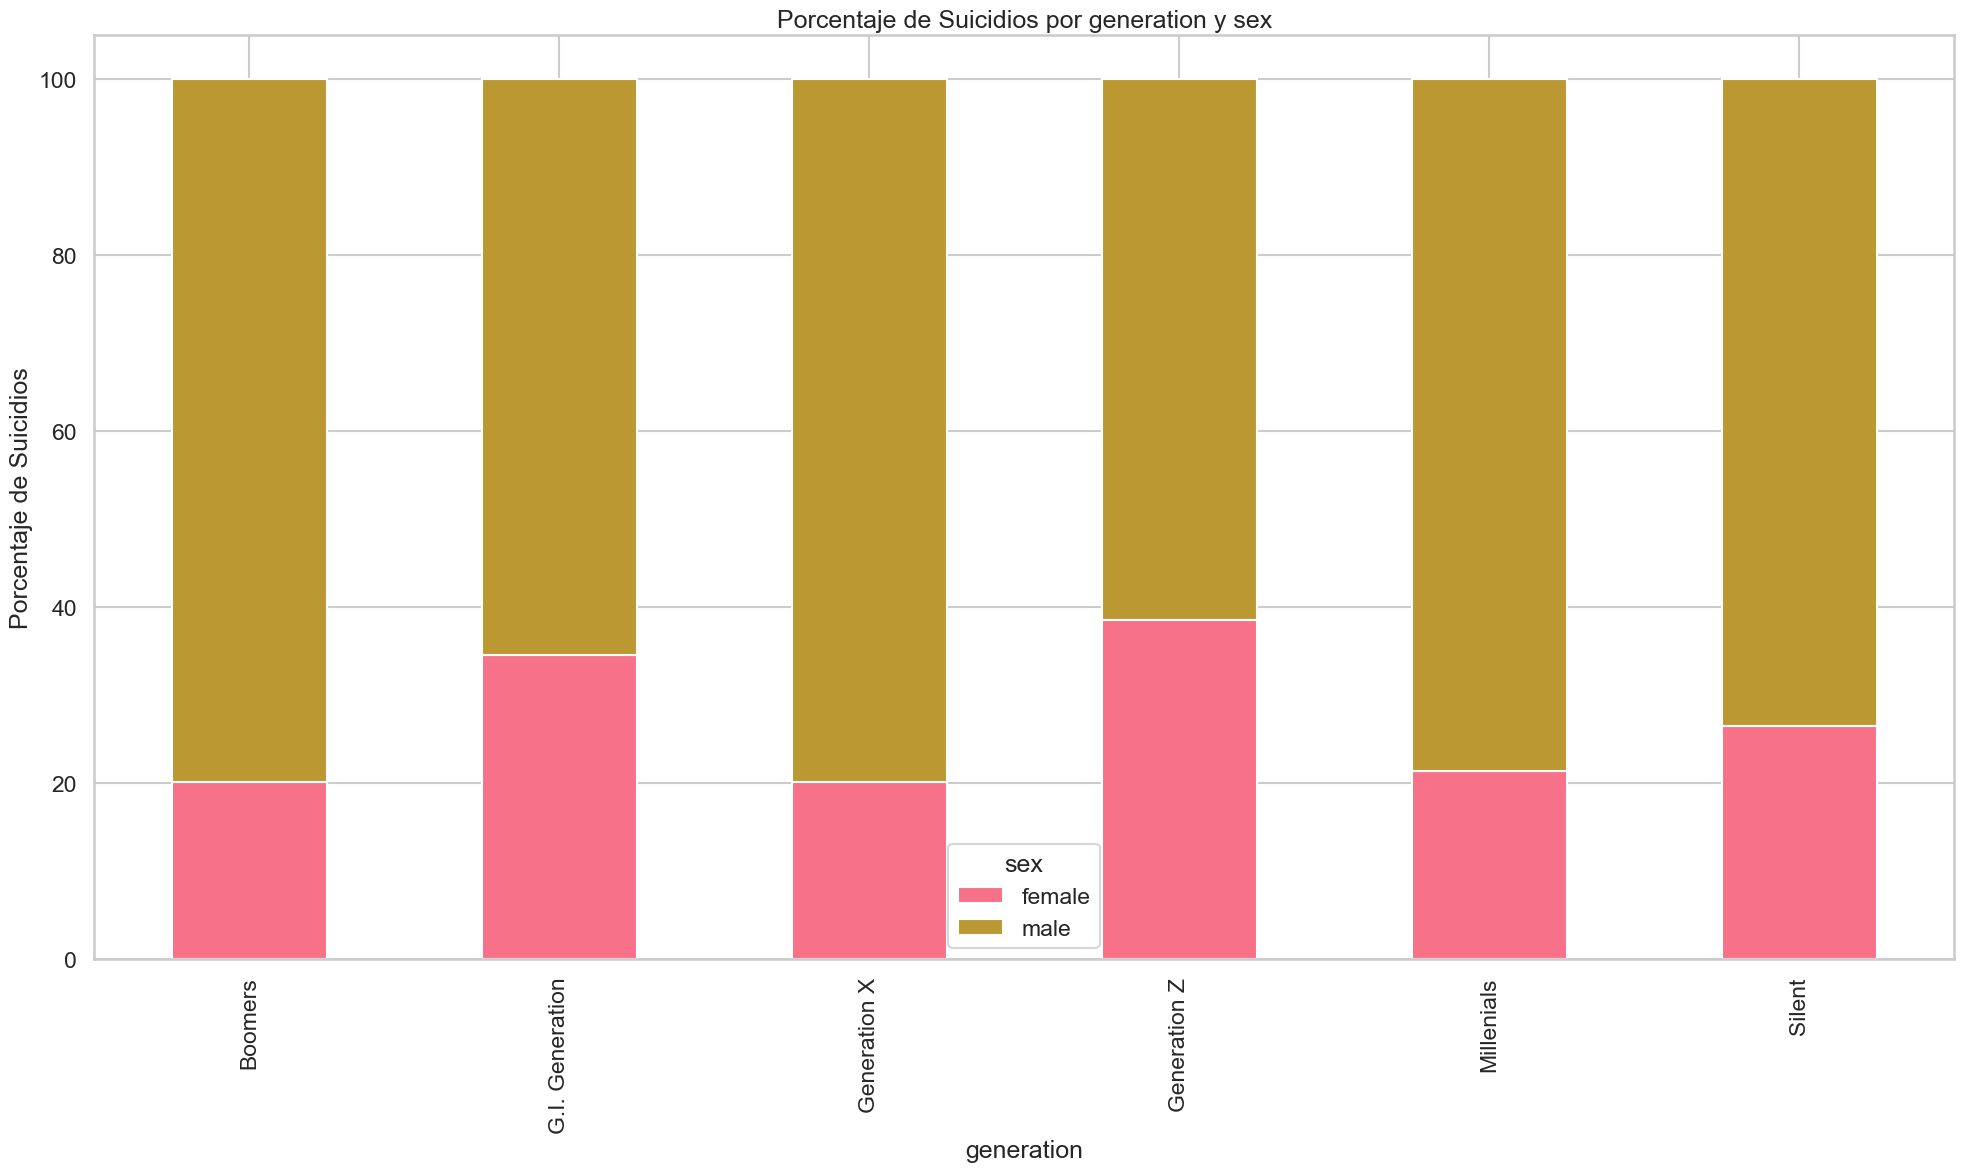

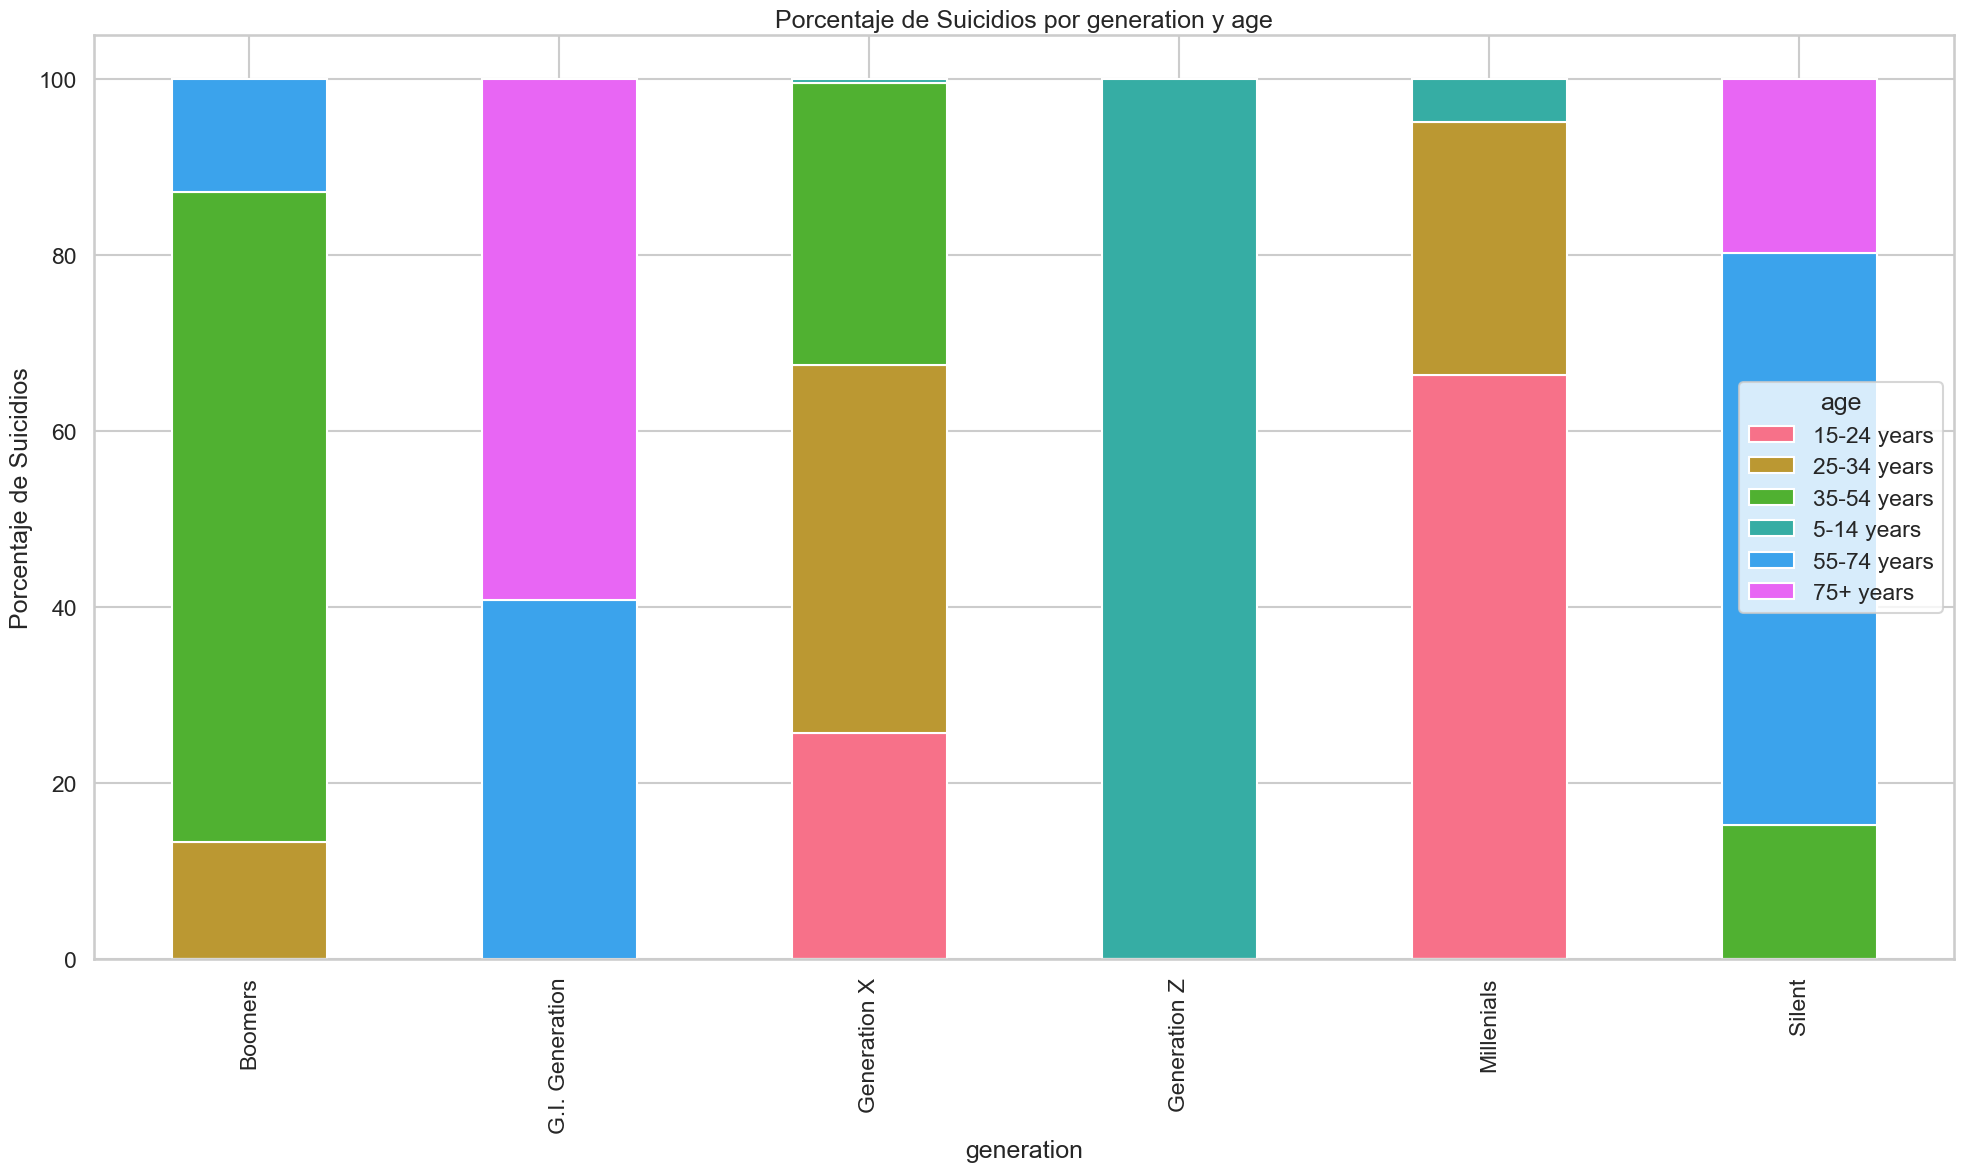

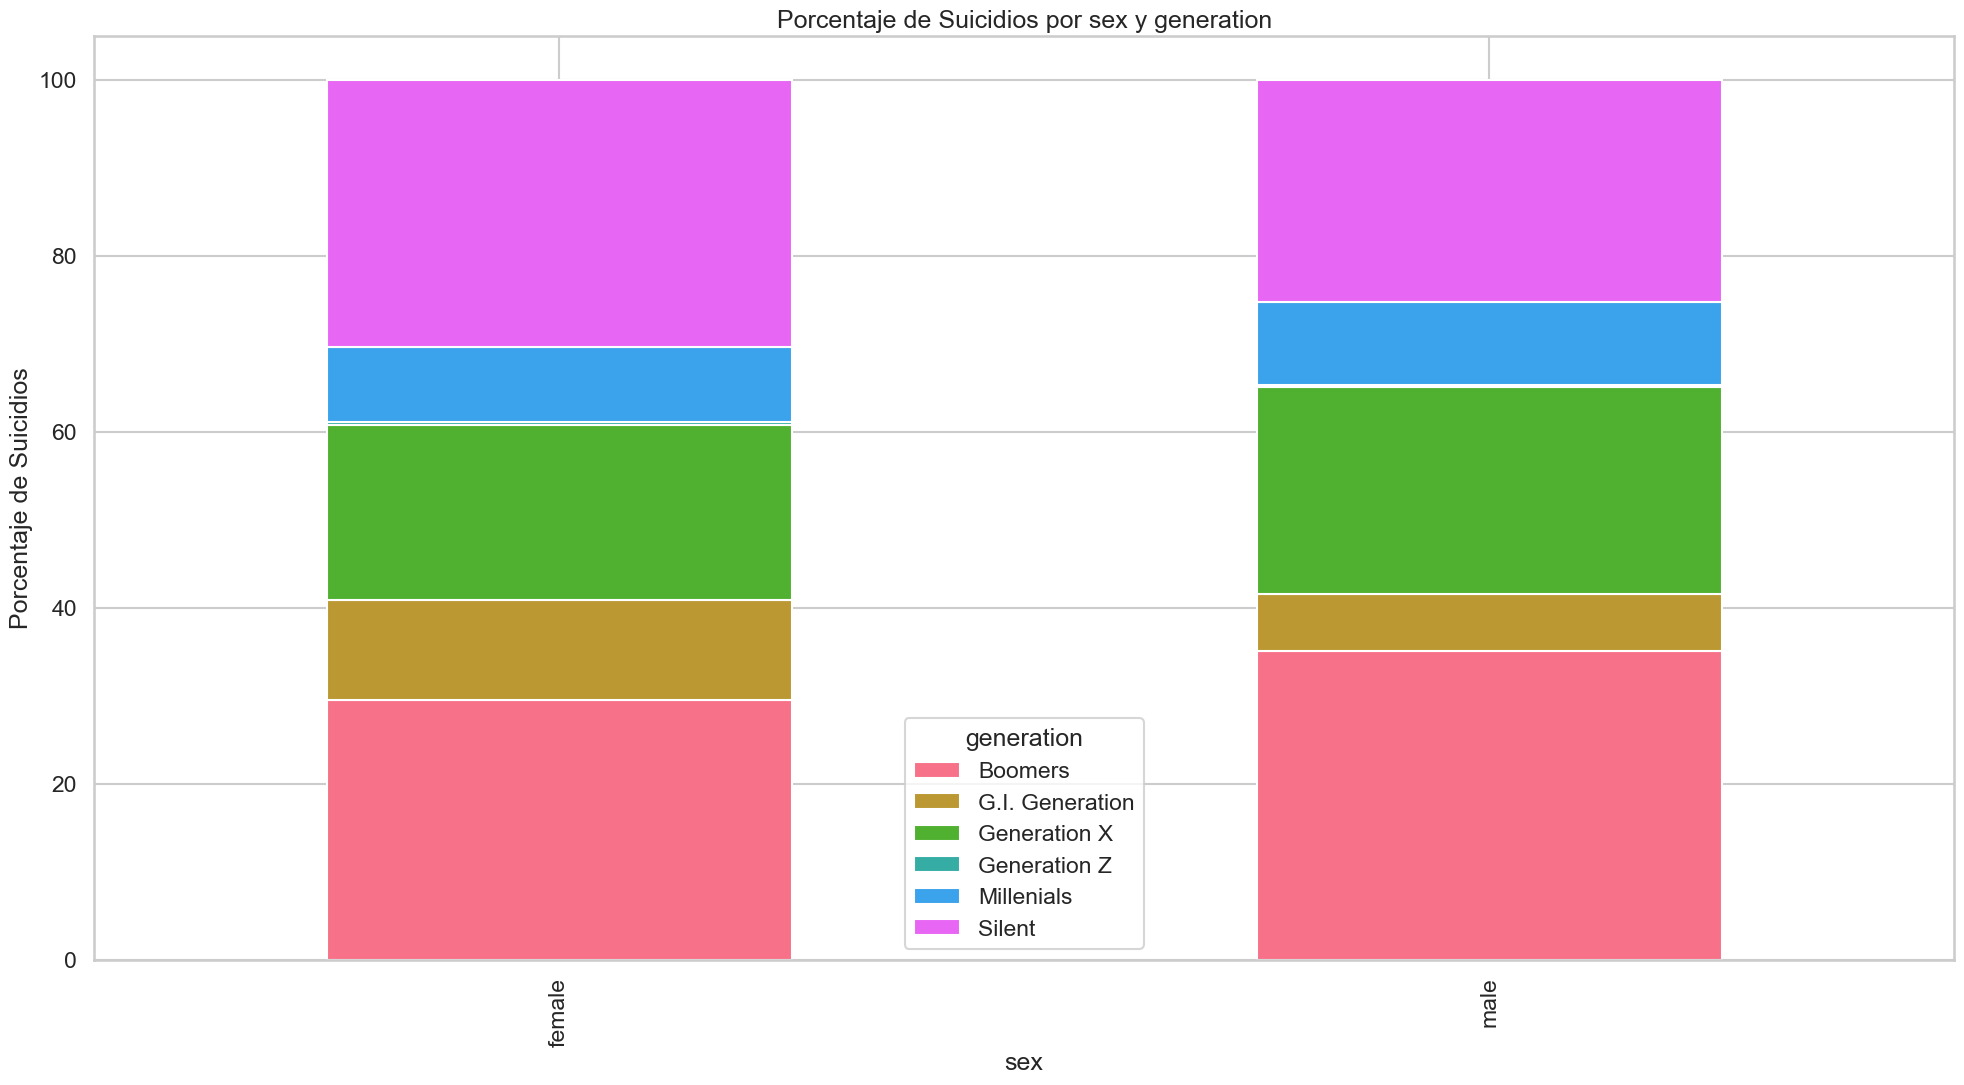

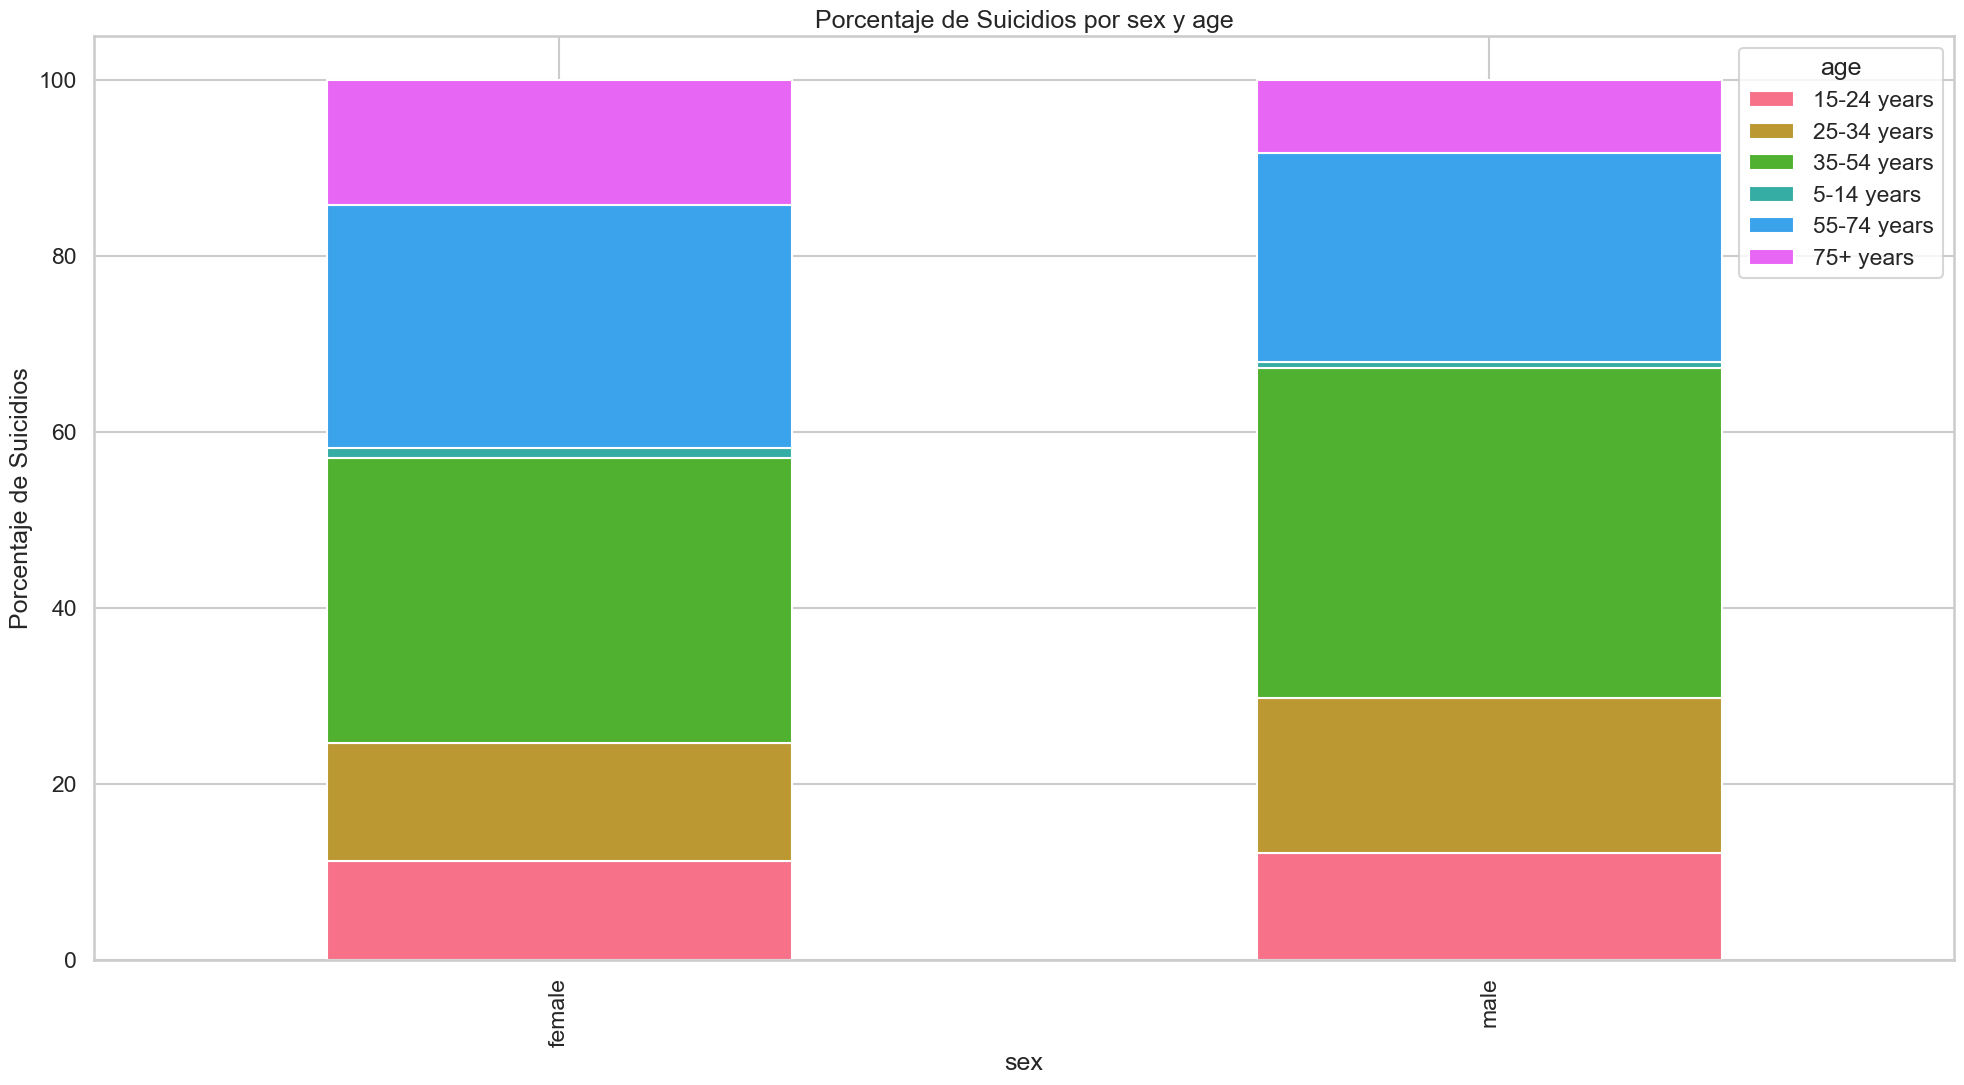

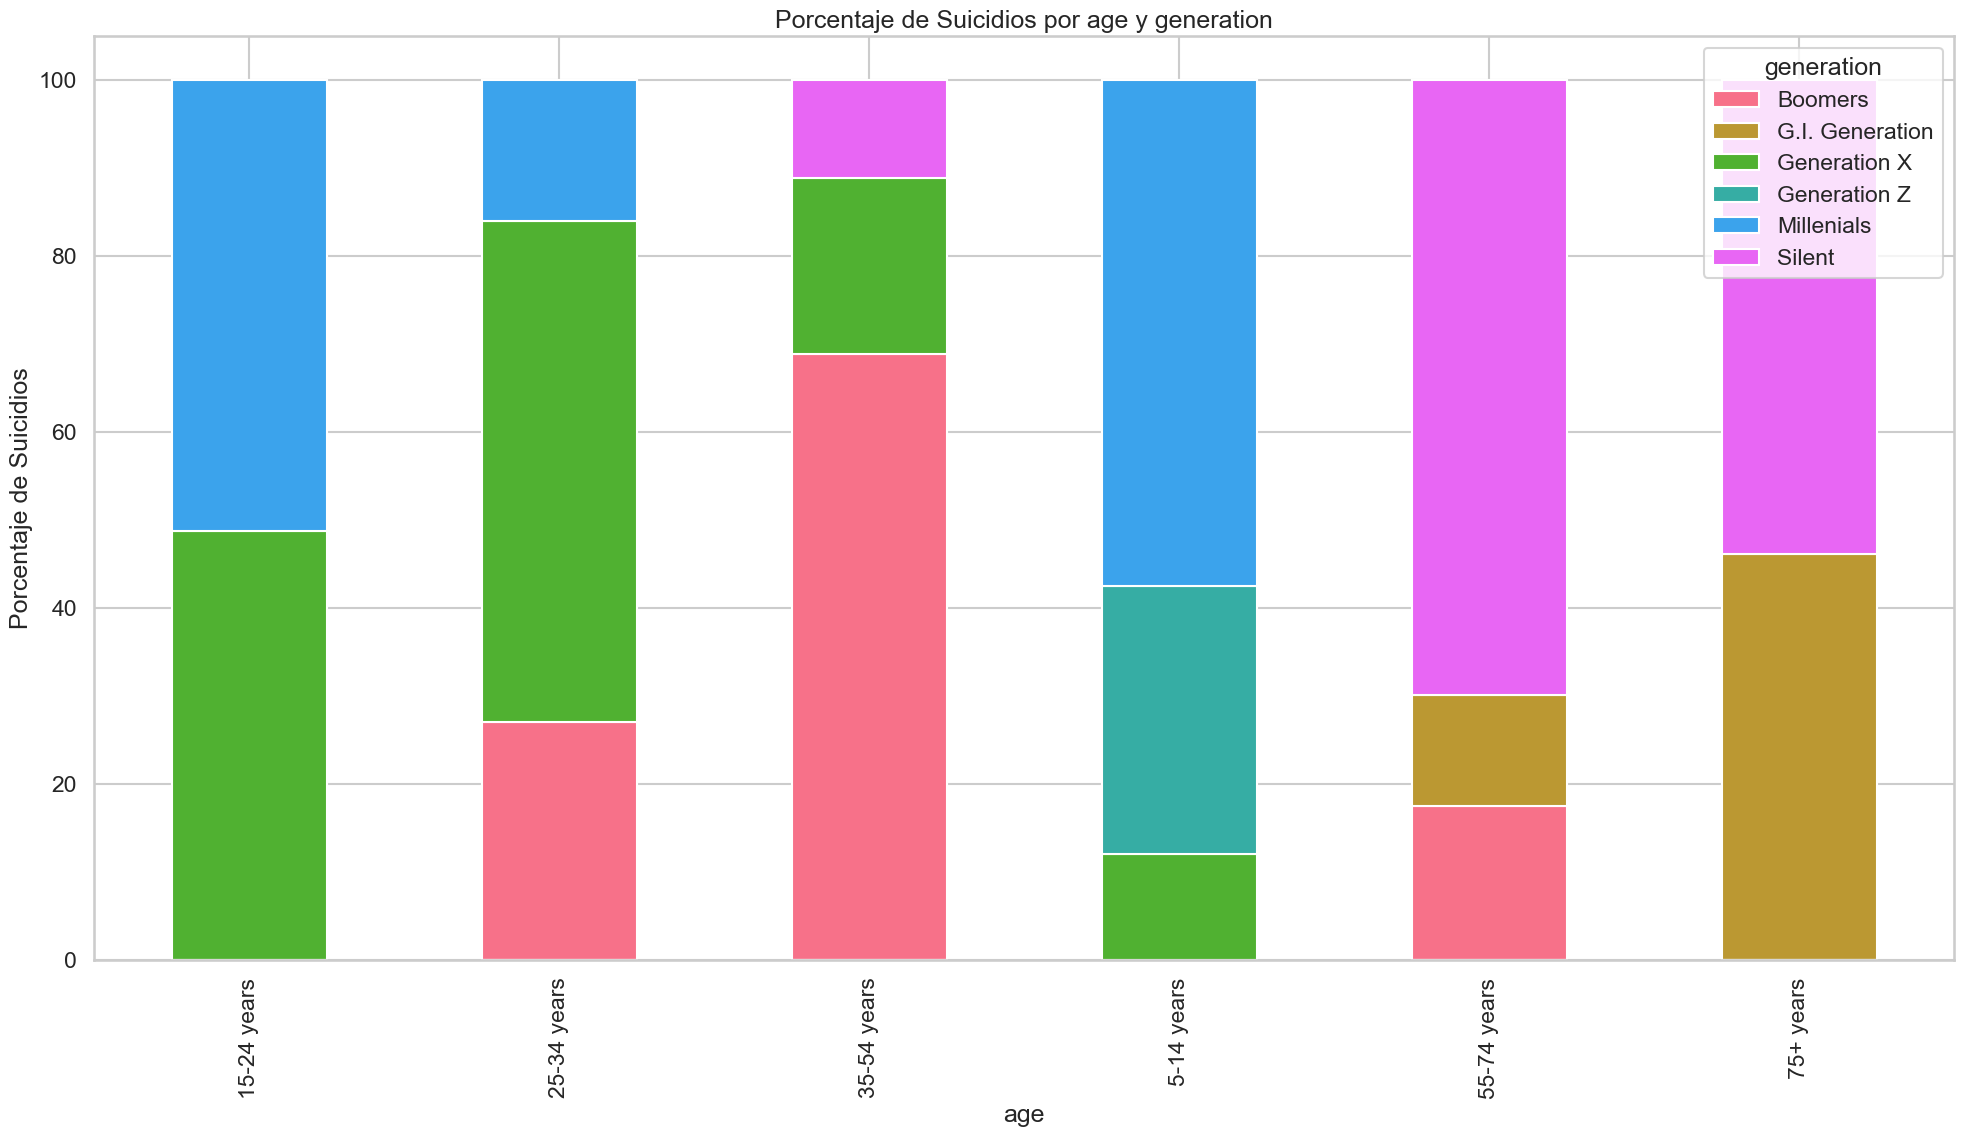

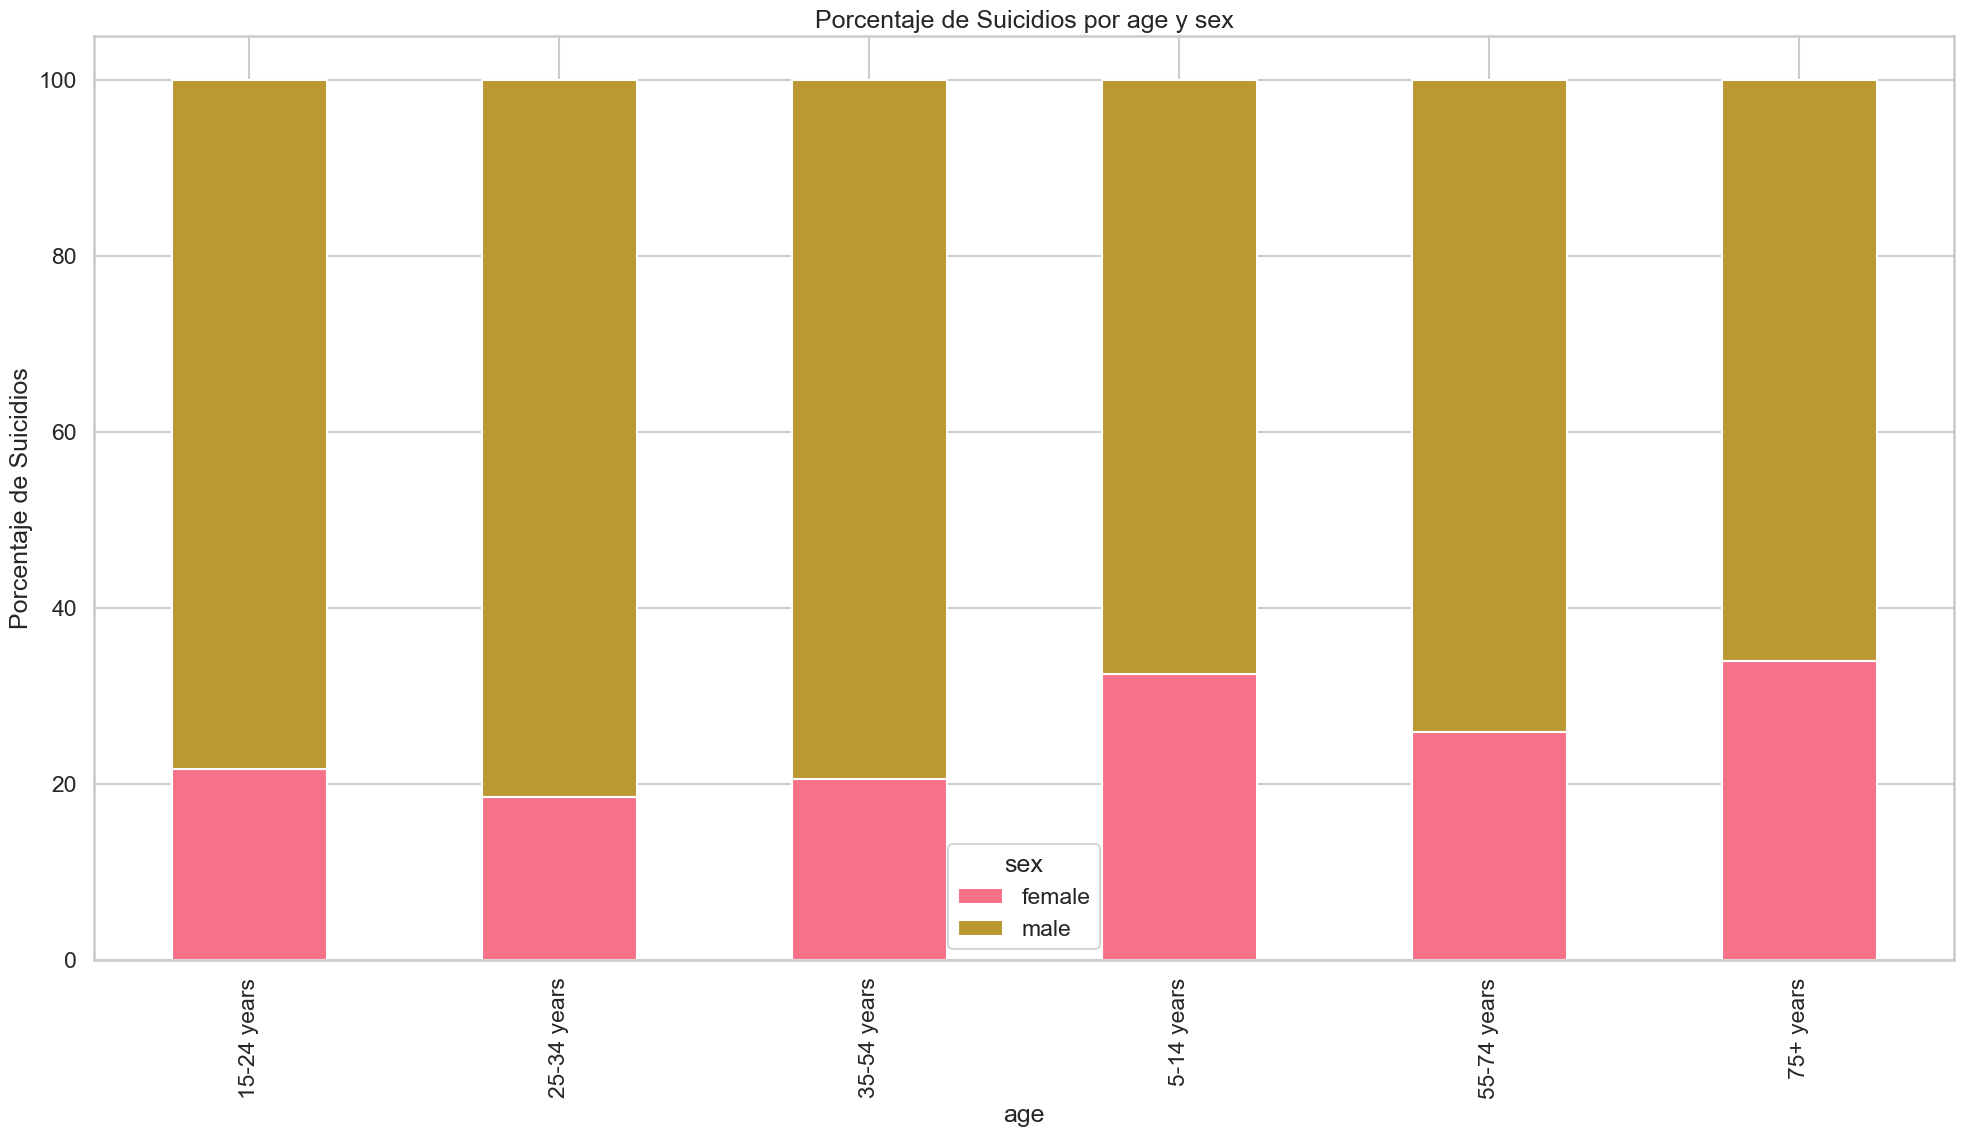

Tablas de resumen de variables categóricas:
Resumen de Porcentaje de Suicidios por generation y sex:


sex                 female       male
generation                           
Boomers          20.178087  79.821913
G.I. Generation  34.637232  65.362768
Generation X     20.213869  79.786131
Generation Z     38.608072  61.391928
Millenials       21.432043  78.567957
Silent           26.507119  73.492881



Resumen de Porcentaje de Suicidios por generation y age:


age              15-24 years  25-34 years  35-54 years  5-14 years  \
generation                                                           
Boomers                  NaN    13.314216    73.933923         NaN   
G.I. Generation          NaN          NaN          NaN         NaN   
Generation X       25.724881    41.789492    32.072855    0.412773   
Generation Z             NaN          NaN          NaN  100.000000   
Millenials         66.440616    28.742548          NaN    4.816836   
Silent                   NaN          NaN    15.238328         NaN   

age              55-74 years  75+ years  
generation                               
Boomers            12.751861        NaN  
G.I. Generation    40.902808  59.097192  
Generation X             NaN        NaN  
Generation Z             NaN        NaN  
Millenials               NaN        NaN  
Silent             65.021630  19.740041



Resumen de Porcentaje de Suicidios por sex y generation:


generation    Boomers  G.I. Generation  Generation X  Generation Z  \
sex                                                                  
female      29.558515        11.327468     19.867715      0.393778   
male        35.142833         6.424394     23.568823      0.188190   

generation  Millenials     Silent  
sex                                
female        8.568076  30.284448  
male          9.440114  25.235647



Resumen de Porcentaje de Suicidios por sex y age:


age     15-24 years  25-34 years  35-54 years  5-14 years  55-74 years  \
sex                                                                      
female    11.249495    13.390296    32.461029    1.089894    27.575072   
male      12.201117    17.635476    37.501286    0.679661    23.673700   

age     75+ years  
sex                
female  14.234215  
male     8.308758



Resumen de Porcentaje de Suicidios por age y generation:


generation     Boomers  G.I. Generation  Generation X  Generation Z  \
age                                                                   
15-24 years        NaN              NaN     48.768277           NaN   
25-34 years  27.062884              NaN     56.992985           NaN   
35-54 years  68.879359              NaN     20.048358           NaN   
5-14 years         NaN              NaN     12.105847     30.433951   
55-74 years  17.565632        12.578545           NaN           NaN   
75+ years          NaN        46.148016           NaN           NaN   

generation   Millenials     Silent  
age                                 
15-24 years   51.231723        NaN  
25-34 years   15.944131        NaN  
35-54 years         NaN  11.072283  
5-14 years    57.460202        NaN  
55-74 years         NaN  69.855823  
75+ years           NaN  53.851984



Resumen de Porcentaje de Suicidios por age y sex:


sex             female       male
age                              
15-24 years  21.697945  78.302055
25-34 years  18.580013  81.419987
35-54 years  20.644531  79.355469
5-14 years   32.521430  67.478570
55-74 years  25.930104  74.069896
75+ years    33.988345  66.011655

In [170]:
categorical_summary = {}

# Gráfico de Barras Apiladas
for col in categorical_cols[:-1]:
    for col2 in categorical_cols[:-1]:
        if col != col2:
            grouped_data = datos.groupby([col, col2])['suicides_no'].sum().unstack()
            stacked_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100  # Calcular porcentaje

            stacked_data.plot(kind='bar', stacked=True, figsize=(24, 12))
            plt.title(f"Porcentaje de Suicidios por {col} y {col2}")
            plt.xlabel(col)
            plt.ylabel("Porcentaje de Suicidios")
            plt.show()

            # Almacenar el resumen de porcentajes
            summary = stacked_data
            categorical_summary[f"{col} y {col2}"] = summary

# Mostrar las tablas de resumen de variables categóricas
print("Tablas de resumen de variables categóricas:")
for cols, summary in categorical_summary.items():
    print(f"Resumen de Porcentaje de Suicidios por {cols}:")
    display(summary)

# Análisis Exploratorio de Datos (EDA)

## Mapa de Calor y Tabla de Correlación

El mapa de calor de correlación y la tabla de correlación nos brindan información sobre las relaciones entre las variables numéricas en nuestro conjunto de datos. A continuación, se detallan las correlaciones encontradas:

### Año (year) y Número de suicidios (suicides_no)
La correlación es muy baja (-0.0045), lo que sugiere que no existe una relación lineal fuerte entre el año y el número de suicidios. Esto indica que el número de suicidios no depende fuertemente del año.

### Población (population) y Número de suicidios (suicides_no)
Existe una correlación positiva moderada (0.6162), indicando que un aumento en la población tiende a asociarse con un aumento en el número de suicidios. Sin embargo, esta correlación no implica una relación causal.

### Número de suicidios por cada 100,000 habitantes (suicides/100k pop) y Número de suicidios (suicides_no)
Se observa una correlación positiva moderada (0.3066), lo que significa que un mayor número de suicidios por cada 100,000 habitantes se relaciona con un mayor número total de suicidios.

### HDI (Índice de Desarrollo Humano) para el año (HDI for year) y Número de suicidios (suicides_no)
La correlación es baja (0.0632), sugiriendo que el HDI para el año no influye significativamente en el número de suicidios.

### GDP per capita (Ingreso per cápita en dólares) y Número de suicidios (suicides_no)
Existe una correlación positiva moderada (0.0613), indicando que un mayor ingreso per cápita se asocia con un mayor número de suicidios. Sin embargo, esta correlación es relativamente baja y no implica una relación causal.

### Año (year) y GDP per capita (Ingreso per cápita en dólares)
Hay una correlación positiva (0.3391), sugiriendo que el ingreso per cápita tiende a aumentar con el tiempo.

### HDI (Índice de Desarrollo Humano) para el año (HDI for year) y GDP per capita (Ingreso per cápita en dólares)
Existe una correlación positiva fuerte (0.5023), lo que significa que un mayor índice de desarrollo humano se correlaciona positivamente con un mayor ingreso per cápita.

El mapa de calor y la tabla de correlación son herramientas útiles para visualizar y cuantificar las relaciones entre las variables en nuestro conjunto de datos.

## Análisis de Relaciones y Correlaciones

Se realizaron análisis de relaciones y correlaciones utilizando las variables numéricas y categóricas en nuestro conjunto de datos. A continuación, se presentan los resultados:

### Gráficos de Dispersión

Se crearon gráficos de dispersión para analizar la relación entre la Tasa de Suicidio (suicides/100k pop) y las variables "Índice de Desarrollo Humano (HDI for year)" y "Ingreso per cápita (gdp_per_capita ($))" en función de las variables categóricas (generation, sex, age y country). Estos gráficos ayudan a visualizar cómo las tasas de suicidio se distribuyen en relación con estas dos variables numéricas y las variables categóricas.

### Correlaciones con "HDI for year"

- "suicides_no": Correlación baja (0.0632).
- "population": Correlación baja (0.0572).
- "suicides/100k pop": Correlación baja (0.0379).
- "HDI for year" (consigo mismo): Correlación perfecta (1.0).
- "gdp_per_capita ($)": Correlación moderada (0.5023).
- "year": Correlación baja (0.2022).

Estos resultados indican que la variable "HDI for year" tiene una correlación moderada con "gdp_per_capita ($)," lo que sugiere que el Índice de Desarrollo Humano y el Ingreso per cápita están relacionados en cierta medida. Sin embargo, las otras variables numéricas tienen correlaciones más bajas con "HDI for year."

### Correlaciones con "gdp_per_capita ($)"

- "suicides_no": Correlación baja (0.0613).
- "population": Correlación moderada (0.0815).
- "suicides/100k pop": Correlación baja (0.0018).
- "HDI for year": Correlación moderada (0.5023).
- "gdp_per_capita ($)": Correlación perfecta (1.0).
- "year": Correlación moderada (0.3391).

Estos resultados indican que la variable "gdp_per_capita (\$)" tiene una correlación moderada con "year" y una correlación más baja con las demás variables numéricas. La correlación perfecta (1.0) entre "gdp_per_capita (\$)" consigo mismo se debe a que es la misma variable.

### Gráficos de Caja (Boxplots)

Se crearon gráficos de caja para analizar la distribución de la Tasa de Suicidio (suicides/100k pop) en función de las variables categóricas "generation," "sex," "age" y la variable numérica "year." A continuación, se presentan los resúmenes de estos análisis:

- En cuanto a la variable "generation," se observa que la tasa de suicidio tiende a variar entre diferentes generaciones, con "Boomers" y "Silent" mostrando tasas más altas en comparación con otras generaciones.
- En relación con la variable "sex," los hombres tienden a tener tasas de suicidio significativamente más altas que las mujeres.
- En función de la variable "age," se observa que las tasas de suicidio son más altas en los grupos de edad "75+ years" y "35-54 years."
- En relación con la variable "year," no se observan patrones claros de cambio en la tasa de suicidio a lo largo de los años.


## Análisis de la Tasa de Suicidio (suicides/100k pop)

La Tasa de Suicidio (suicides/100k pop) es una variable crucial en nuestro conjunto de datos, ya que refleja la prevalencia de suicidios en relación con la población. A continuación, se analizan las relaciones y correlaciones con esta variable:

### Correlaciones de la Tasa de Suicidio (suicides/100k pop)

- **Población (population)**: La Tasa de Suicidio (suicides/100k pop) muestra una correlación positiva moderada (0.3066) con la población. Esto significa que, en general, un aumento en la población se asocia con un aumento en la Tasa de Suicidio. Sin embargo, esto no implica una relación causal, ya que otros factores pueden influir en las tasas de suicidio.

- **Año (year)**: No se observa una correlación significativa (-0.0056) entre el año y la Tasa de Suicidio, lo que sugiere que las tasas de suicidio no dependen fuertemente del año.

- **HDI (Índice de Desarrollo Humano) para el año (HDI for year)**: La correlación con el HDI es baja (0.0622), lo que indica que el Índice de Desarrollo Humano para el año no influye significativamente en la Tasa de Suicidio.

- **Ingreso per cápita (gdp_per_capita ($))**: La correlación con el ingreso per cápita es baja (0.0017), lo que sugiere que la relación entre el ingreso per cápita y la Tasa de Suicidio es débil.

### Análisis de la Tasa de Suicidio por Grupos

Se crearon gráficos de caja para analizar la distribución de la Tasa de Suicidio en función de las variables categóricas:

- **Generación (generation)**: Se observa que la Tasa de Suicidio tiende a variar entre diferentes generaciones. Las generaciones "Boomers" y "Silent" muestran tasas más altas en comparación con otras generaciones.

- **Género (sex)**: Los hombres tienen tasas de suicidio significativamente más altas que las mujeres.

- **Grupo de Edad (age)**: Las tasas de suicidio son más altas en los grupos de edad "75+ years" y "35-54 years."

## Conclusiones

- La Tasa de Suicidio muestra una correlación moderada con la población, lo que sugiere que un aumento en la población se relaciona con un aumento en la Tasa de Suicidio, pero esto no implica una relación causal.
- La Tasa de Suicidio no parece depender fuertemente del año, el Índice de Desarrollo Humano ni el ingreso per cápita, ya que las correlaciones son bajas.
- Las tasas de suicidio varían significativamente según la generación, el género y el grupo de edad. Las generaciones "Boomers" y "Silent," los hombres y los grupos de edad "75+ years" y "35-54 years" muestran tasas más altas.
- El número de suicidios no muestra una correlación fuerte con el año, la población o el Índice de Desarrollo Humano (HDI).
- Existe una correlación moderada entre la población y el número de suicidios, lo que sugiere que un aumento en la población se relaciona con un aumento en el número de suicidios, pero esto no implica una relación causal.
- La tasa de suicidio por cada 100,000 habitantes tiene una correlación positiva moderada con el número de suicidios, lo que indica que un mayor número de suicidios por cada 100,000 habitantes se relaciona con un mayor número total de suicidios.
- El Índice de Desarrollo Humano (HDI) y el Ingreso per cápita muestran una correlación positiva fuerte, lo que sugiere que un mayor índice de desarrollo humano se correlaciona positivamente con un mayor ingreso per cápita.
- La tasa de suicidio varía según la generación, el género y el grupo de edad, con tasas más altas entre los "Boomers" y "Silent," los hombres y los grupos de edad "75+ years" y "35-54 years," respectivamente.

